In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf

2022-11-24 22:20:36.976061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
dataset = read_csv("folder/subfolder/dataToModel.csv",index_col= 0,sep=";")

In [5]:
dataset.head()

rok  ms  dz  godz  fco2_MQ  fco2_HQ  fco2_raw  glwody  T50cm  T2m  ...  \
0  2013   1   1   0.5     0.15      0.0      0.15     5.2    1.2  1.5  ...   
1  2013   1   1   1.5    -0.60      0.0     -0.60     5.2    0.9  1.2  ...   
2  2013   1   1   2.5     0.57      0.0      0.57     5.4    0.7  1.0  ...   
3  2013   1   1   3.5     0.03      0.0      0.03     5.5    0.3  0.6  ...   
4  2013   1   1   4.5     0.03      0.0      0.03     5.5   -0.4 -0.0  ...   

    Ku     Ld     Lu    ppp    v   vdir  Tgrunt    vwc  PARd  PARu  
0  0.9  249.3  322.9  998.5  3.4  210.5     0.6  0.785   0.0   0.0  
1  1.0  249.5  323.5  998.1  3.3  202.5     0.6  0.785   0.0   0.0  
2  1.0  249.7  324.0  997.6  3.3  201.6     0.6  0.785   0.0   0.0  
3  0.9  250.0  324.5  997.2  2.6  191.6     0.6  0.785   0.0   0.0  
4  1.5  250.2  325.1  996.8  2.2  189.1     0.6  0.785   0.0   0.0  

[5 rows x 21 columns]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rok       40342 non-null  int64  
 1   ms        40342 non-null  int64  
 2   dz        40342 non-null  int64  
 3   godz      40342 non-null  float64
 4   fco2_MQ   23815 non-null  float64
 5   fco2_HQ   40342 non-null  float64
 6   fco2_raw  40342 non-null  float64
 7   glwody    40342 non-null  float64
 8   T50cm     40342 non-null  float64
 9   T2m       40342 non-null  float64
 10  Kd        40342 non-null  float64
 11  Ku        40342 non-null  float64
 12  Ld        40342 non-null  float64
 13  Lu        40342 non-null  float64
 14  ppp       40342 non-null  float64
 15  v         40342 non-null  float64
 16  vdir      40342 non-null  float64
 17  Tgrunt    40342 non-null  float64
 18  vwc       40342 non-null  float64
 19  PARd      40342 non-null  float64
 20  PARu      40342 non-null  fl

In [7]:
dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok'], inplace = True)
#dataset.drop(columns  = [ 'fMOD_NN', 'fMOD_E0', 'fMODlut', 'fMODsrr','dz','godz','ms','fco2_MQ'], inplace = True)

In [8]:
dataset.head(2220)

fco2_HQ  fco2_raw  glwody  T50cm   T2m     Kd    Ku     Ld     Lu  \
0         0.0      0.15     5.2    1.2   1.5    0.0   0.9  249.3  322.9   
1         0.0     -0.60     5.2    0.9   1.2    0.0   1.0  249.5  323.5   
2         0.0      0.57     5.4    0.7   1.0    0.0   1.0  249.7  324.0   
3         0.0      0.03     5.5    0.3   0.6    0.0   0.9  250.0  324.5   
4         0.0      0.03     5.5   -0.4  -0.0    0.0   1.5  250.2  325.1   
...       ...       ...     ...    ...   ...    ...   ...    ...    ...   
2215      1.0     -5.00     3.6   20.4  19.5  665.8  80.1  327.0  443.0   
2216      1.0     -6.26     3.4   21.6  20.8  770.0  85.6  332.4  455.7   
2217      1.0     -0.04     3.2   22.5  21.9  841.9  91.9  337.6  465.5   
2218      0.0     -2.90     3.1   23.1  22.5  876.3  98.5  340.0  471.3   
2219      0.0     -5.18     3.2   23.9  23.6  856.8  97.2  344.3  477.2   

         ppp    v   vdir  Tgrunt    vwc    PARd  PARu  
0      998.5  3.4  210.5     0.6  0.785     0.0   0.0  
1      998.1  3.3  202.5     0.6  0.785     0.0   0.0  
2      997.6  3.3  201.6     0.6  0.785     0.0   0.0  
3      997.2  2.6  191.6     0.6  0.785     0.0   0.0  
4      996.8  2.2  189.1     0.6  0.785     0.0   0.0  
...      ...  ...    ...     ...    ...     ...   ...  
2215  1001.2  0.6   19.7    17.4  0.774  1347.1  70.6  
2216  1000.9  1.1    2.0    17.6  0.774  1575.5  70.7  
2217  1000.9  1.4   38.9    17.9  0.773  1738.3  74.9  
2218  1000.7  1.2   81.7    18.5  0.773  1798.4  85.1  
2219  1000.6  0.8  129.9    19.1  0.773  1745.1  79.8  

[2220 rows x 16 columns]

In [9]:
values = dataset.values
values = values.astype('float64')

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)

In [11]:
scaled.head(2220)

0         1         2         3         4         5         6   \
0     0.0  0.518109  0.869646  0.413005  0.423423  0.000000  0.001652   
1     0.0  0.517643  0.869646  0.407733  0.418018  0.000000  0.001836   
2     0.0  0.518370  0.871508  0.404218  0.414414  0.000000  0.001836   
3     0.0  0.518034  0.872439  0.397188  0.407207  0.000000  0.001652   
4     0.0  0.518034  0.872439  0.384886  0.396396  0.000000  0.002753   
...   ...       ...       ...       ...       ...       ...       ...   
2215  1.0  0.514905  0.854749  0.750439  0.747748  0.669213  0.147026   
2216  1.0  0.514121  0.852886  0.771529  0.771171  0.773947  0.157122   
2217  1.0  0.517991  0.851024  0.787346  0.790991  0.846216  0.168686   
2218  0.0  0.516212  0.850093  0.797891  0.801802  0.880792  0.180800   
2219  0.0  0.514793  0.851024  0.811951  0.821622  0.861192  0.178414   

            7         8         9         10        11        12        13  \
0     0.334327  0.347342  0.535762  0.293103  0.584722  0.045045  0.795009   
1     0.334990  0.349252  0.530364  0.284483  0.562500  0.045045  0.795009   
2     0.335653  0.350844  0.523617  0.284483  0.560000  0.045045  0.795009   
3     0.336647  0.352436  0.518219  0.224138  0.532222  0.045045  0.795009   
4     0.337309  0.354346  0.512821  0.189655  0.525278  0.045045  0.795009   
...        ...       ...       ...       ...       ...       ...       ...   
2215  0.591783  0.729704  0.572200  0.051724  0.054722  0.801802  0.775401   
2216  0.609675  0.770137  0.568151  0.094828  0.005556  0.810811  0.775401   
2217  0.626905  0.801337  0.568151  0.120690  0.108056  0.824324  0.773619   
2218  0.634858  0.819803  0.565452  0.103448  0.226944  0.851351  0.773619   
2219  0.649105  0.838586  0.564103  0.068966  0.360833  0.878378  0.773619   

            14        15  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.000000  0.000000  
...        ...       ...  
2215  0.655204  0.051001  
2216  0.766294  0.051073  
2217  0.845477  0.054107  
2218  0.874708  0.061475  
2219  0.848784  0.057646  

[2220 rows x 16 columns]

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fco2_HQ   40342 non-null  float64
 1   fco2_raw  40342 non-null  float64
 2   glwody    40342 non-null  float64
 3   T50cm     40342 non-null  float64
 4   T2m       40342 non-null  float64
 5   Kd        40342 non-null  float64
 6   Ku        40342 non-null  float64
 7   Ld        40342 non-null  float64
 8   Lu        40342 non-null  float64
 9   ppp       40342 non-null  float64
 10  v         40342 non-null  float64
 11  vdir      40342 non-null  float64
 12  Tgrunt    40342 non-null  float64
 13  vwc       40342 non-null  float64
 14  PARd      40342 non-null  float64
 15  PARu      40342 non-null  float64
dtypes: float64(16)
memory usage: 5.2 MB


In [13]:
dataset.shape

(40342, 16)

In [14]:
list0 = []
list1 = []
i=0
#agroup=0
#list1.append(0)
#for window in dataset.rolling(window=3):
for window in scaled.rolling(window=3):
    #print(window)
    print(window.shape)
   
    if(window.shape==(3,window.shape[1])):
        i+=1
        print("Number of window "+ str(i))
        list0.append(np.asarray(window.copy()))
        y=0
        shape = window.shape
        #print(window[0])
      
        #for test in range(shape[0]) :
        for index, test in window.iterrows() :
            print(y)
            if (y==2) :
                print(test[0])
                list1.append(test[0])
                agroup=test[0]
            y+=1
       # for index2, test2 in window.iterrows() :
        #    test2[0]=agroup
         #   print(test2[0])
            
        
        

#list1.append(0)

(1, 16)
(2, 16)
(3, 16)
Number of window 1
0
1
2
0.0
(3, 16)
Number of window 2
0
1
2
0.0
(3, 16)
Number of window 3
0
1
2
0.0
(3, 16)
Number of window 4
0
1
2
0.0
(3, 16)
Number of window 5
0
1
2
0.0
(3, 16)
Number of window 6
0
1
2
0.0
(3, 16)
Number of window 7
0
1
2
0.0
(3, 16)
Number of window 8
0
1
2
0.0
(3, 16)
Number of window 9
0
1
2
0.0
(3, 16)
Number of window 10
0
1
2
0.0
(3, 16)
Number of window 11
0
1
2
0.0
(3, 16)
Number of window 12
0
1
2
0.0
(3, 16)
Number of window 13
0
1
2
0.0
(3, 16)
Number of window 14
0
1
2
0.0
(3, 16)
Number of window 15
0
1
2
0.0
(3, 16)
Number of window 16
0
1
2
0.0
(3, 16)
Number of window 17
0
1
2
0.0
(3, 16)
Number of window 18
0
1
2
0.0
(3, 16)
Number of window 19
0
1
2
0.0
(3, 16)
Number of window 20
0
1
2
0.0
(3, 16)
Number of window 21
0
1
2
0.0
(3, 16)
Number of window 22
0
1
2
0.0
(3, 16)
Number of window 23
0
1
2
0.0
(3, 16)
Number of window 24
0
1
2
0.0
(3, 16)
Number of window 25
0
1
2
0.0
(3, 16)
Number of window 26
0
1
2
0.0
(3, 1

0
1
2
0.0
(3, 16)
Number of window 287
0
1
2
0.0
(3, 16)
Number of window 288
0
1
2
0.0
(3, 16)
Number of window 289
0
1
2
0.0
(3, 16)
Number of window 290
0
1
2
0.0
(3, 16)
Number of window 291
0
1
2
0.0
(3, 16)
Number of window 292
0
1
2
0.0
(3, 16)
Number of window 293
0
1
2
0.0
(3, 16)
Number of window 294
0
1
2
0.0
(3, 16)
Number of window 295
0
1
2
0.0
(3, 16)
Number of window 296
0
1
2
0.0
(3, 16)
Number of window 297
0
1
2
0.0
(3, 16)
Number of window 298
0
1
2
0.0
(3, 16)
Number of window 299
0
1
2
0.0
(3, 16)
Number of window 300
0
1
2
0.0
(3, 16)
Number of window 301
0
1
2
0.0
(3, 16)
Number of window 302
0
1
2
0.0
(3, 16)
Number of window 303
0
1
2
0.0
(3, 16)
Number of window 304
0
1
2
0.0
(3, 16)
Number of window 305
0
1
2
0.0
(3, 16)
Number of window 306
0
1
2
0.0
(3, 16)
Number of window 307
0
1
2
0.0
(3, 16)
Number of window 308
0
1
2
0.0
(3, 16)
Number of window 309
0
1
2
0.0
(3, 16)
Number of window 310
0
1
2
0.0
(3, 16)
Number of window 311
0
1
2
0.0
(3, 16)
Number 

0
1
2
0.0
(3, 16)
Number of window 557
0
1
2
0.0
(3, 16)
Number of window 558
0
1
2
0.0
(3, 16)
Number of window 559
0
1
2
0.0
(3, 16)
Number of window 560
0
1
2
0.0
(3, 16)
Number of window 561
0
1
2
0.0
(3, 16)
Number of window 562
0
1
2
0.0
(3, 16)
Number of window 563
0
1
2
0.0
(3, 16)
Number of window 564
0
1
2
0.0
(3, 16)
Number of window 565
0
1
2
0.0
(3, 16)
Number of window 566
0
1
2
0.0
(3, 16)
Number of window 567
0
1
2
0.0
(3, 16)
Number of window 568
0
1
2
0.0
(3, 16)
Number of window 569
0
1
2
0.0
(3, 16)
Number of window 570
0
1
2
0.0
(3, 16)
Number of window 571
0
1
2
0.0
(3, 16)
Number of window 572
0
1
2
0.0
(3, 16)
Number of window 573
0
1
2
0.0
(3, 16)
Number of window 574
0
1
2
0.0
(3, 16)
Number of window 575
0
1
2
0.0
(3, 16)
Number of window 576
0
1
2
0.0
(3, 16)
Number of window 577
0
1
2
0.0
(3, 16)
Number of window 578
0
1
2
0.0
(3, 16)
Number of window 579
0
1
2
0.0
(3, 16)
Number of window 580
0
1
2
0.0
(3, 16)
Number of window 581
0
1
2
0.0
(3, 16)
Number 

0
1
2
0.0
(3, 16)
Number of window 1061
0
1
2
0.0
(3, 16)
Number of window 1062
0
1
2
0.0
(3, 16)
Number of window 1063
0
1
2
0.0
(3, 16)
Number of window 1064
0
1
2
0.0
(3, 16)
Number of window 1065
0
1
2
0.0
(3, 16)
Number of window 1066
0
1
2
0.0
(3, 16)
Number of window 1067
0
1
2
0.0
(3, 16)
Number of window 1068
0
1
2
0.0
(3, 16)
Number of window 1069
0
1
2
0.0
(3, 16)
Number of window 1070
0
1
2
0.0
(3, 16)
Number of window 1071
0
1
2
0.0
(3, 16)
Number of window 1072
0
1
2
0.0
(3, 16)
Number of window 1073
0
1
2
0.0
(3, 16)
Number of window 1074
0
1
2
0.0
(3, 16)
Number of window 1075
0
1
2
0.0
(3, 16)
Number of window 1076
0
1
2
0.0
(3, 16)
Number of window 1077
0
1
2
0.0
(3, 16)
Number of window 1078
0
1
2
0.0
(3, 16)
Number of window 1079
0
1
2
0.0
(3, 16)
Number of window 1080
0
1
2
0.0
(3, 16)
Number of window 1081
0
1
2
0.0
(3, 16)
Number of window 1082
0
1
2
0.0
(3, 16)
Number of window 1083
0
1
2
0.0
(3, 16)
Number of window 1084
0
1
2
0.0
(3, 16)
Number of window 1085


0
1
2
0.0
(3, 16)
Number of window 1497
0
1
2
0.0
(3, 16)
Number of window 1498
0
1
2
0.0
(3, 16)
Number of window 1499
0
1
2
0.0
(3, 16)
Number of window 1500
0
1
2
0.0
(3, 16)
Number of window 1501
0
1
2
0.0
(3, 16)
Number of window 1502
0
1
2
0.0
(3, 16)
Number of window 1503
0
1
2
0.0
(3, 16)
Number of window 1504
0
1
2
0.0
(3, 16)
Number of window 1505
0
1
2
0.0
(3, 16)
Number of window 1506
0
1
2
0.0
(3, 16)
Number of window 1507
0
1
2
0.0
(3, 16)
Number of window 1508
0
1
2
0.0
(3, 16)
Number of window 1509
0
1
2
0.0
(3, 16)
Number of window 1510
0
1
2
0.0
(3, 16)
Number of window 1511
0
1
2
1.0
(3, 16)
Number of window 1512
0
1
2
0.0
(3, 16)
Number of window 1513
0
1
2
0.0
(3, 16)
Number of window 1514
0
1
2
0.0
(3, 16)
Number of window 1515
0
1
2
0.0
(3, 16)
Number of window 1516
0
1
2
0.0
(3, 16)
Number of window 1517
0
1
2
0.0
(3, 16)
Number of window 1518
0
1
2
0.0
(3, 16)
Number of window 1519
0
1
2
0.0
(3, 16)
Number of window 1520
0
1
2
0.0
(3, 16)
Number of window 1521


0
1
2
0.0
(3, 16)
Number of window 1939
0
1
2
0.0
(3, 16)
Number of window 1940
0
1
2
0.0
(3, 16)
Number of window 1941
0
1
2
0.0
(3, 16)
Number of window 1942
0
1
2
0.0
(3, 16)
Number of window 1943
0
1
2
0.0
(3, 16)
Number of window 1944
0
1
2
0.0
(3, 16)
Number of window 1945
0
1
2
0.0
(3, 16)
Number of window 1946
0
1
2
1.0
(3, 16)
Number of window 1947
0
1
2
0.0
(3, 16)
Number of window 1948
0
1
2
0.0
(3, 16)
Number of window 1949
0
1
2
0.0
(3, 16)
Number of window 1950
0
1
2
1.0
(3, 16)
Number of window 1951
0
1
2
0.0
(3, 16)
Number of window 1952
0
1
2
1.0
(3, 16)
Number of window 1953
0
1
2
1.0
(3, 16)
Number of window 1954
0
1
2
1.0
(3, 16)
Number of window 1955
0
1
2
1.0
(3, 16)
Number of window 1956
0
1
2
1.0
(3, 16)
Number of window 1957
0
1
2
1.0
(3, 16)
Number of window 1958
0
1
2
0.0
(3, 16)
Number of window 1959
0
1
2
1.0
(3, 16)
Number of window 1960
0
1
2
0.0
(3, 16)
Number of window 1961
0
1
2
0.0
(3, 16)
Number of window 1962
0
1
2
0.0
(3, 16)
Number of window 1963


0
1
2
0.0
(3, 16)
Number of window 2368
0
1
2
0.0
(3, 16)
Number of window 2369
0
1
2
0.0
(3, 16)
Number of window 2370
0
1
2
1.0
(3, 16)
Number of window 2371
0
1
2
1.0
(3, 16)
Number of window 2372
0
1
2
0.0
(3, 16)
Number of window 2373
0
1
2
0.0
(3, 16)
Number of window 2374
0
1
2
0.0
(3, 16)
Number of window 2375
0
1
2
1.0
(3, 16)
Number of window 2376
0
1
2
1.0
(3, 16)
Number of window 2377
0
1
2
0.0
(3, 16)
Number of window 2378
0
1
2
0.0
(3, 16)
Number of window 2379
0
1
2
1.0
(3, 16)
Number of window 2380
0
1
2
1.0
(3, 16)
Number of window 2381
0
1
2
1.0
(3, 16)
Number of window 2382
0
1
2
1.0
(3, 16)
Number of window 2383
0
1
2
0.0
(3, 16)
Number of window 2384
0
1
2
1.0
(3, 16)
Number of window 2385
0
1
2
1.0
(3, 16)
Number of window 2386
0
1
2
1.0
(3, 16)
Number of window 2387
0
1
2
0.0
(3, 16)
Number of window 2388
0
1
2
1.0
(3, 16)
Number of window 2389
0
1
2
0.0
(3, 16)
Number of window 2390
0
1
2
1.0
(3, 16)
Number of window 2391
0
1
2
0.0
(3, 16)
Number of window 2392


0
1
2
0.0
(3, 16)
Number of window 2651
0
1
2
0.0
(3, 16)
Number of window 2652
0
1
2
1.0
(3, 16)
Number of window 2653
0
1
2
1.0
(3, 16)
Number of window 2654
0
1
2
0.0
(3, 16)
Number of window 2655
0
1
2
0.0
(3, 16)
Number of window 2656
0
1
2
0.0
(3, 16)
Number of window 2657
0
1
2
0.0
(3, 16)
Number of window 2658
0
1
2
0.0
(3, 16)
Number of window 2659
0
1
2
0.0
(3, 16)
Number of window 2660
0
1
2
0.0
(3, 16)
Number of window 2661
0
1
2
0.0
(3, 16)
Number of window 2662
0
1
2
0.0
(3, 16)
Number of window 2663
0
1
2
0.0
(3, 16)
Number of window 2664
0
1
2
0.0
(3, 16)
Number of window 2665
0
1
2
0.0
(3, 16)
Number of window 2666
0
1
2
1.0
(3, 16)
Number of window 2667
0
1
2
1.0
(3, 16)
Number of window 2668
0
1
2
1.0
(3, 16)
Number of window 2669
0
1
2
0.0
(3, 16)
Number of window 2670
0
1
2
1.0
(3, 16)
Number of window 2671
0
1
2
1.0
(3, 16)
Number of window 2672
0
1
2
1.0
(3, 16)
Number of window 2673
0
1
2
0.0
(3, 16)
Number of window 2674
0
1
2
1.0
(3, 16)
Number of window 2675


0
1
2
0.0
(3, 16)
Number of window 3102
0
1
2
0.0
(3, 16)
Number of window 3103
0
1
2
0.0
(3, 16)
Number of window 3104
0
1
2
0.0
(3, 16)
Number of window 3105
0
1
2
0.0
(3, 16)
Number of window 3106
0
1
2
0.0
(3, 16)
Number of window 3107
0
1
2
0.0
(3, 16)
Number of window 3108
0
1
2
0.0
(3, 16)
Number of window 3109
0
1
2
0.0
(3, 16)
Number of window 3110
0
1
2
0.0
(3, 16)
Number of window 3111
0
1
2
0.0
(3, 16)
Number of window 3112
0
1
2
0.0
(3, 16)
Number of window 3113
0
1
2
1.0
(3, 16)
Number of window 3114
0
1
2
0.0
(3, 16)
Number of window 3115
0
1
2
0.0
(3, 16)
Number of window 3116
0
1
2
0.0
(3, 16)
Number of window 3117
0
1
2
0.0
(3, 16)
Number of window 3118
0
1
2
0.0
(3, 16)
Number of window 3119
0
1
2
0.0
(3, 16)
Number of window 3120
0
1
2
1.0
(3, 16)
Number of window 3121
0
1
2
1.0
(3, 16)
Number of window 3122
0
1
2
1.0
(3, 16)
Number of window 3123
0
1
2
0.0
(3, 16)
Number of window 3124
0
1
2
0.0
(3, 16)
Number of window 3125
0
1
2
0.0
(3, 16)
Number of window 3126


0
1
2
0.0
(3, 16)
Number of window 3660
0
1
2
0.0
(3, 16)
Number of window 3661
0
1
2
0.0
(3, 16)
Number of window 3662
0
1
2
1.0
(3, 16)
Number of window 3663
0
1
2
1.0
(3, 16)
Number of window 3664
0
1
2
1.0
(3, 16)
Number of window 3665
0
1
2
1.0
(3, 16)
Number of window 3666
0
1
2
1.0
(3, 16)
Number of window 3667
0
1
2
1.0
(3, 16)
Number of window 3668
0
1
2
0.0
(3, 16)
Number of window 3669
0
1
2
0.0
(3, 16)
Number of window 3670
0
1
2
0.0
(3, 16)
Number of window 3671
0
1
2
1.0
(3, 16)
Number of window 3672
0
1
2
1.0
(3, 16)
Number of window 3673
0
1
2
1.0
(3, 16)
Number of window 3674
0
1
2
0.0
(3, 16)
Number of window 3675
0
1
2
0.0
(3, 16)
Number of window 3676
0
1
2
0.0
(3, 16)
Number of window 3677
0
1
2
0.0
(3, 16)
Number of window 3678
0
1
2
0.0
(3, 16)
Number of window 3679
0
1
2
0.0
(3, 16)
Number of window 3680
0
1
2
0.0
(3, 16)
Number of window 3681
0
1
2
1.0
(3, 16)
Number of window 3682
0
1
2
0.0
(3, 16)
Number of window 3683
0
1
2
0.0
(3, 16)
Number of window 3684


0
1
2
0.0
(3, 16)
Number of window 3895
0
1
2
0.0
(3, 16)
Number of window 3896
0
1
2
1.0
(3, 16)
Number of window 3897
0
1
2
1.0
(3, 16)
Number of window 3898
0
1
2
1.0
(3, 16)
Number of window 3899
0
1
2
0.0
(3, 16)
Number of window 3900
0
1
2
0.0
(3, 16)
Number of window 3901
0
1
2
1.0
(3, 16)
Number of window 3902
0
1
2
1.0
(3, 16)
Number of window 3903
0
1
2
1.0
(3, 16)
Number of window 3904
0
1
2
1.0
(3, 16)
Number of window 3905
0
1
2
1.0
(3, 16)
Number of window 3906
0
1
2
1.0
(3, 16)
Number of window 3907
0
1
2
0.0
(3, 16)
Number of window 3908
0
1
2
1.0
(3, 16)
Number of window 3909
0
1
2
1.0
(3, 16)
Number of window 3910
0
1
2
1.0
(3, 16)
Number of window 3911
0
1
2
1.0
(3, 16)
Number of window 3912
0
1
2
1.0
(3, 16)
Number of window 3913
0
1
2
1.0
(3, 16)
Number of window 3914
0
1
2
0.0
(3, 16)
Number of window 3915
0
1
2
0.0
(3, 16)
Number of window 3916
0
1
2
0.0
(3, 16)
Number of window 3917
0
1
2
0.0
(3, 16)
Number of window 3918
0
1
2
0.0
(3, 16)
Number of window 3919


0
1
2
0.0
(3, 16)
Number of window 4287
0
1
2
0.0
(3, 16)
Number of window 4288
0
1
2
1.0
(3, 16)
Number of window 4289
0
1
2
0.0
(3, 16)
Number of window 4290
0
1
2
0.0
(3, 16)
Number of window 4291
0
1
2
0.0
(3, 16)
Number of window 4292
0
1
2
0.0
(3, 16)
Number of window 4293
0
1
2
0.0
(3, 16)
Number of window 4294
0
1
2
0.0
(3, 16)
Number of window 4295
0
1
2
0.0
(3, 16)
Number of window 4296
0
1
2
0.0
(3, 16)
Number of window 4297
0
1
2
0.0
(3, 16)
Number of window 4298
0
1
2
0.0
(3, 16)
Number of window 4299
0
1
2
0.0
(3, 16)
Number of window 4300
0
1
2
0.0
(3, 16)
Number of window 4301
0
1
2
0.0
(3, 16)
Number of window 4302
0
1
2
0.0
(3, 16)
Number of window 4303
0
1
2
0.0
(3, 16)
Number of window 4304
0
1
2
0.0
(3, 16)
Number of window 4305
0
1
2
0.0
(3, 16)
Number of window 4306
0
1
2
0.0
(3, 16)
Number of window 4307
0
1
2
0.0
(3, 16)
Number of window 4308
0
1
2
1.0
(3, 16)
Number of window 4309
0
1
2
0.0
(3, 16)
Number of window 4310
0
1
2
1.0
(3, 16)
Number of window 4311


0
1
2
1.0
(3, 16)
Number of window 4805
0
1
2
0.0
(3, 16)
Number of window 4806
0
1
2
0.0
(3, 16)
Number of window 4807
0
1
2
0.0
(3, 16)
Number of window 4808
0
1
2
0.0
(3, 16)
Number of window 4809
0
1
2
0.0
(3, 16)
Number of window 4810
0
1
2
0.0
(3, 16)
Number of window 4811
0
1
2
0.0
(3, 16)
Number of window 4812
0
1
2
0.0
(3, 16)
Number of window 4813
0
1
2
0.0
(3, 16)
Number of window 4814
0
1
2
0.0
(3, 16)
Number of window 4815
0
1
2
0.0
(3, 16)
Number of window 4816
0
1
2
0.0
(3, 16)
Number of window 4817
0
1
2
0.0
(3, 16)
Number of window 4818
0
1
2
0.0
(3, 16)
Number of window 4819
0
1
2
0.0
(3, 16)
Number of window 4820
0
1
2
0.0
(3, 16)
Number of window 4821
0
1
2
0.0
(3, 16)
Number of window 4822
0
1
2
0.0
(3, 16)
Number of window 4823
0
1
2
0.0
(3, 16)
Number of window 4824
0
1
2
0.0
(3, 16)
Number of window 4825
0
1
2
0.0
(3, 16)
Number of window 4826
0
1
2
0.0
(3, 16)
Number of window 4827
0
1
2
0.0
(3, 16)
Number of window 4828
0
1
2
0.0
(3, 16)
Number of window 4829


0
1
2
0.0
(3, 16)
Number of window 5083
0
1
2
0.0
(3, 16)
Number of window 5084
0
1
2
0.0
(3, 16)
Number of window 5085
0
1
2
0.0
(3, 16)
Number of window 5086
0
1
2
0.0
(3, 16)
Number of window 5087
0
1
2
0.0
(3, 16)
Number of window 5088
0
1
2
1.0
(3, 16)
Number of window 5089
0
1
2
0.0
(3, 16)
Number of window 5090
0
1
2
0.0
(3, 16)
Number of window 5091
0
1
2
0.0
(3, 16)
Number of window 5092
0
1
2
0.0
(3, 16)
Number of window 5093
0
1
2
1.0
(3, 16)
Number of window 5094
0
1
2
1.0
(3, 16)
Number of window 5095
0
1
2
1.0
(3, 16)
Number of window 5096
0
1
2
1.0
(3, 16)
Number of window 5097
0
1
2
0.0
(3, 16)
Number of window 5098
0
1
2
0.0
(3, 16)
Number of window 5099
0
1
2
0.0
(3, 16)
Number of window 5100
0
1
2
0.0
(3, 16)
Number of window 5101
0
1
2
0.0
(3, 16)
Number of window 5102
0
1
2
0.0
(3, 16)
Number of window 5103
0
1
2
1.0
(3, 16)
Number of window 5104
0
1
2
0.0
(3, 16)
Number of window 5105
0
1
2
1.0
(3, 16)
Number of window 5106
0
1
2
1.0
(3, 16)
Number of window 5107


0
1
2
0.0
(3, 16)
Number of window 5518
0
1
2
0.0
(3, 16)
Number of window 5519
0
1
2
0.0
(3, 16)
Number of window 5520
0
1
2
0.0
(3, 16)
Number of window 5521
0
1
2
0.0
(3, 16)
Number of window 5522
0
1
2
0.0
(3, 16)
Number of window 5523
0
1
2
0.0
(3, 16)
Number of window 5524
0
1
2
1.0
(3, 16)
Number of window 5525
0
1
2
1.0
(3, 16)
Number of window 5526
0
1
2
1.0
(3, 16)
Number of window 5527
0
1
2
0.0
(3, 16)
Number of window 5528
0
1
2
0.0
(3, 16)
Number of window 5529
0
1
2
0.0
(3, 16)
Number of window 5530
0
1
2
0.0
(3, 16)
Number of window 5531
0
1
2
0.0
(3, 16)
Number of window 5532
0
1
2
0.0
(3, 16)
Number of window 5533
0
1
2
0.0
(3, 16)
Number of window 5534
0
1
2
0.0
(3, 16)
Number of window 5535
0
1
2
1.0
(3, 16)
Number of window 5536
0
1
2
0.0
(3, 16)
Number of window 5537
0
1
2
1.0
(3, 16)
Number of window 5538
0
1
2
1.0
(3, 16)
Number of window 5539
0
1
2
1.0
(3, 16)
Number of window 5540
0
1
2
0.0
(3, 16)
Number of window 5541
0
1
2
0.0
(3, 16)
Number of window 5542


0
1
2
0.0
(3, 16)
Number of window 5741
0
1
2
0.0
(3, 16)
Number of window 5742
0
1
2
0.0
(3, 16)
Number of window 5743
0
1
2
0.0
(3, 16)
Number of window 5744
0
1
2
0.0
(3, 16)
Number of window 5745
0
1
2
0.0
(3, 16)
Number of window 5746
0
1
2
0.0
(3, 16)
Number of window 5747
0
1
2
0.0
(3, 16)
Number of window 5748
0
1
2
0.0
(3, 16)
Number of window 5749
0
1
2
0.0
(3, 16)
Number of window 5750
0
1
2
0.0
(3, 16)
Number of window 5751
0
1
2
1.0
(3, 16)
Number of window 5752
0
1
2
0.0
(3, 16)
Number of window 5753
0
1
2
0.0
(3, 16)
Number of window 5754
0
1
2
0.0
(3, 16)
Number of window 5755
0
1
2
0.0
(3, 16)
Number of window 5756
0
1
2
0.0
(3, 16)
Number of window 5757
0
1
2
0.0
(3, 16)
Number of window 5758
0
1
2
0.0
(3, 16)
Number of window 5759
0
1
2
0.0
(3, 16)
Number of window 5760
0
1
2
0.0
(3, 16)
Number of window 5761
0
1
2
0.0
(3, 16)
Number of window 5762
0
1
2
0.0
(3, 16)
Number of window 5763
0
1
2
0.0
(3, 16)
Number of window 5764
0
1
2
0.0
(3, 16)
Number of window 5765


0
1
2
1.0
(3, 16)
Number of window 6104
0
1
2
1.0
(3, 16)
Number of window 6105
0
1
2
1.0
(3, 16)
Number of window 6106
0
1
2
1.0
(3, 16)
Number of window 6107
0
1
2
0.0
(3, 16)
Number of window 6108
0
1
2
0.0
(3, 16)
Number of window 6109
0
1
2
0.0
(3, 16)
Number of window 6110
0
1
2
0.0
(3, 16)
Number of window 6111
0
1
2
0.0
(3, 16)
Number of window 6112
0
1
2
0.0
(3, 16)
Number of window 6113
0
1
2
0.0
(3, 16)
Number of window 6114
0
1
2
0.0
(3, 16)
Number of window 6115
0
1
2
1.0
(3, 16)
Number of window 6116
0
1
2
0.0
(3, 16)
Number of window 6117
0
1
2
0.0
(3, 16)
Number of window 6118
0
1
2
0.0
(3, 16)
Number of window 6119
0
1
2
0.0
(3, 16)
Number of window 6120
0
1
2
0.0
(3, 16)
Number of window 6121
0
1
2
0.0
(3, 16)
Number of window 6122
0
1
2
0.0
(3, 16)
Number of window 6123
0
1
2
0.0
(3, 16)
Number of window 6124
0
1
2
0.0
(3, 16)
Number of window 6125
0
1
2
0.0
(3, 16)
Number of window 6126
0
1
2
0.0
(3, 16)
Number of window 6127
0
1
2
0.0
(3, 16)
Number of window 6128


0
1
2
0.0
(3, 16)
Number of window 6690
0
1
2
0.0
(3, 16)
Number of window 6691
0
1
2
0.0
(3, 16)
Number of window 6692
0
1
2
0.0
(3, 16)
Number of window 6693
0
1
2
0.0
(3, 16)
Number of window 6694
0
1
2
0.0
(3, 16)
Number of window 6695
0
1
2
0.0
(3, 16)
Number of window 6696
0
1
2
0.0
(3, 16)
Number of window 6697
0
1
2
0.0
(3, 16)
Number of window 6698
0
1
2
0.0
(3, 16)
Number of window 6699
0
1
2
0.0
(3, 16)
Number of window 6700
0
1
2
0.0
(3, 16)
Number of window 6701
0
1
2
0.0
(3, 16)
Number of window 6702
0
1
2
0.0
(3, 16)
Number of window 6703
0
1
2
0.0
(3, 16)
Number of window 6704
0
1
2
0.0
(3, 16)
Number of window 6705
0
1
2
0.0
(3, 16)
Number of window 6706
0
1
2
0.0
(3, 16)
Number of window 6707
0
1
2
1.0
(3, 16)
Number of window 6708
0
1
2
0.0
(3, 16)
Number of window 6709
0
1
2
1.0
(3, 16)
Number of window 6710
0
1
2
1.0
(3, 16)
Number of window 6711
0
1
2
1.0
(3, 16)
Number of window 6712
0
1
2
0.0
(3, 16)
Number of window 6713
0
1
2
0.0
(3, 16)
Number of window 6714


0
1
2
0.0
(3, 16)
Number of window 6918
0
1
2
1.0
(3, 16)
Number of window 6919
0
1
2
1.0
(3, 16)
Number of window 6920
0
1
2
1.0
(3, 16)
Number of window 6921
0
1
2
0.0
(3, 16)
Number of window 6922
0
1
2
0.0
(3, 16)
Number of window 6923
0
1
2
0.0
(3, 16)
Number of window 6924
0
1
2
0.0
(3, 16)
Number of window 6925
0
1
2
0.0
(3, 16)
Number of window 6926
0
1
2
0.0
(3, 16)
Number of window 6927
0
1
2
0.0
(3, 16)
Number of window 6928
0
1
2
0.0
(3, 16)
Number of window 6929
0
1
2
0.0
(3, 16)
Number of window 6930
0
1
2
0.0
(3, 16)
Number of window 6931
0
1
2
0.0
(3, 16)
Number of window 6932
0
1
2
0.0
(3, 16)
Number of window 6933
0
1
2
0.0
(3, 16)
Number of window 6934
0
1
2
0.0
(3, 16)
Number of window 6935
0
1
2
0.0
(3, 16)
Number of window 6936
0
1
2
0.0
(3, 16)
Number of window 6937
0
1
2
0.0
(3, 16)
Number of window 6938
0
1
2
0.0
(3, 16)
Number of window 6939
0
1
2
0.0
(3, 16)
Number of window 6940
0
1
2
0.0
(3, 16)
Number of window 6941
0
1
2
0.0
(3, 16)
Number of window 6942


0
1
2
0.0
(3, 16)
Number of window 7212
0
1
2
0.0
(3, 16)
Number of window 7213
0
1
2
1.0
(3, 16)
Number of window 7214
0
1
2
1.0
(3, 16)
Number of window 7215
0
1
2
0.0
(3, 16)
Number of window 7216
0
1
2
1.0
(3, 16)
Number of window 7217
0
1
2
1.0
(3, 16)
Number of window 7218
0
1
2
0.0
(3, 16)
Number of window 7219
0
1
2
0.0
(3, 16)
Number of window 7220
0
1
2
0.0
(3, 16)
Number of window 7221
0
1
2
0.0
(3, 16)
Number of window 7222
0
1
2
0.0
(3, 16)
Number of window 7223
0
1
2
0.0
(3, 16)
Number of window 7224
0
1
2
0.0
(3, 16)
Number of window 7225
0
1
2
0.0
(3, 16)
Number of window 7226
0
1
2
0.0
(3, 16)
Number of window 7227
0
1
2
0.0
(3, 16)
Number of window 7228
0
1
2
0.0
(3, 16)
Number of window 7229
0
1
2
0.0
(3, 16)
Number of window 7230
0
1
2
1.0
(3, 16)
Number of window 7231
0
1
2
1.0
(3, 16)
Number of window 7232
0
1
2
1.0
(3, 16)
Number of window 7233
0
1
2
1.0
(3, 16)
Number of window 7234
0
1
2
1.0
(3, 16)
Number of window 7235
0
1
2
1.0
(3, 16)
Number of window 7236


0
1
2
0.0
(3, 16)
Number of window 7517
0
1
2
0.0
(3, 16)
Number of window 7518
0
1
2
0.0
(3, 16)
Number of window 7519
0
1
2
0.0
(3, 16)
Number of window 7520
0
1
2
0.0
(3, 16)
Number of window 7521
0
1
2
0.0
(3, 16)
Number of window 7522
0
1
2
0.0
(3, 16)
Number of window 7523
0
1
2
0.0
(3, 16)
Number of window 7524
0
1
2
0.0
(3, 16)
Number of window 7525
0
1
2
0.0
(3, 16)
Number of window 7526
0
1
2
1.0
(3, 16)
Number of window 7527
0
1
2
0.0
(3, 16)
Number of window 7528
0
1
2
0.0
(3, 16)
Number of window 7529
0
1
2
0.0
(3, 16)
Number of window 7530
0
1
2
0.0
(3, 16)
Number of window 7531
0
1
2
1.0
(3, 16)
Number of window 7532
0
1
2
1.0
(3, 16)
Number of window 7533
0
1
2
1.0
(3, 16)
Number of window 7534
0
1
2
0.0
(3, 16)
Number of window 7535
0
1
2
0.0
(3, 16)
Number of window 7536
0
1
2
0.0
(3, 16)
Number of window 7537
0
1
2
0.0
(3, 16)
Number of window 7538
0
1
2
0.0
(3, 16)
Number of window 7539
0
1
2
0.0
(3, 16)
Number of window 7540
0
1
2
0.0
(3, 16)
Number of window 7541


0
1
2
1.0
(3, 16)
Number of window 7753
0
1
2
1.0
(3, 16)
Number of window 7754
0
1
2
0.0
(3, 16)
Number of window 7755
0
1
2
1.0
(3, 16)
Number of window 7756
0
1
2
1.0
(3, 16)
Number of window 7757
0
1
2
0.0
(3, 16)
Number of window 7758
0
1
2
1.0
(3, 16)
Number of window 7759
0
1
2
1.0
(3, 16)
Number of window 7760
0
1
2
1.0
(3, 16)
Number of window 7761
0
1
2
1.0
(3, 16)
Number of window 7762
0
1
2
1.0
(3, 16)
Number of window 7763
0
1
2
0.0
(3, 16)
Number of window 7764
0
1
2
0.0
(3, 16)
Number of window 7765
0
1
2
0.0
(3, 16)
Number of window 7766
0
1
2
0.0
(3, 16)
Number of window 7767
0
1
2
0.0
(3, 16)
Number of window 7768
0
1
2
0.0
(3, 16)
Number of window 7769
0
1
2
0.0
(3, 16)
Number of window 7770
0
1
2
0.0
(3, 16)
Number of window 7771
0
1
2
0.0
(3, 16)
Number of window 7772
0
1
2
1.0
(3, 16)
Number of window 7773
0
1
2
0.0
(3, 16)
Number of window 7774
0
1
2
0.0
(3, 16)
Number of window 7775
0
1
2
0.0
(3, 16)
Number of window 7776
0
1
2
0.0
(3, 16)
Number of window 7777


0
1
2
0.0
(3, 16)
Number of window 8097
0
1
2
1.0
(3, 16)
Number of window 8098
0
1
2
0.0
(3, 16)
Number of window 8099
0
1
2
0.0
(3, 16)
Number of window 8100
0
1
2
0.0
(3, 16)
Number of window 8101
0
1
2
0.0
(3, 16)
Number of window 8102
0
1
2
0.0
(3, 16)
Number of window 8103
0
1
2
0.0
(3, 16)
Number of window 8104
0
1
2
1.0
(3, 16)
Number of window 8105
0
1
2
0.0
(3, 16)
Number of window 8106
0
1
2
0.0
(3, 16)
Number of window 8107
0
1
2
0.0
(3, 16)
Number of window 8108
0
1
2
0.0
(3, 16)
Number of window 8109
0
1
2
0.0
(3, 16)
Number of window 8110
0
1
2
1.0
(3, 16)
Number of window 8111
0
1
2
1.0
(3, 16)
Number of window 8112
0
1
2
1.0
(3, 16)
Number of window 8113
0
1
2
0.0
(3, 16)
Number of window 8114
0
1
2
0.0
(3, 16)
Number of window 8115
0
1
2
0.0
(3, 16)
Number of window 8116
0
1
2
0.0
(3, 16)
Number of window 8117
0
1
2
0.0
(3, 16)
Number of window 8118
0
1
2
1.0
(3, 16)
Number of window 8119
0
1
2
0.0
(3, 16)
Number of window 8120
0
1
2
0.0
(3, 16)
Number of window 8121


0
1
2
0.0
(3, 16)
Number of window 8317
0
1
2
0.0
(3, 16)
Number of window 8318
0
1
2
0.0
(3, 16)
Number of window 8319
0
1
2
0.0
(3, 16)
Number of window 8320
0
1
2
0.0
(3, 16)
Number of window 8321
0
1
2
0.0
(3, 16)
Number of window 8322
0
1
2
0.0
(3, 16)
Number of window 8323
0
1
2
0.0
(3, 16)
Number of window 8324
0
1
2
1.0
(3, 16)
Number of window 8325
0
1
2
1.0
(3, 16)
Number of window 8326
0
1
2
1.0
(3, 16)
Number of window 8327
0
1
2
1.0
(3, 16)
Number of window 8328
0
1
2
1.0
(3, 16)
Number of window 8329
0
1
2
0.0
(3, 16)
Number of window 8330
0
1
2
1.0
(3, 16)
Number of window 8331
0
1
2
0.0
(3, 16)
Number of window 8332
0
1
2
0.0
(3, 16)
Number of window 8333
0
1
2
0.0
(3, 16)
Number of window 8334
0
1
2
0.0
(3, 16)
Number of window 8335
0
1
2
0.0
(3, 16)
Number of window 8336
0
1
2
0.0
(3, 16)
Number of window 8337
0
1
2
0.0
(3, 16)
Number of window 8338
0
1
2
0.0
(3, 16)
Number of window 8339
0
1
2
0.0
(3, 16)
Number of window 8340
0
1
2
0.0
(3, 16)
Number of window 8341


0
1
2
1.0
(3, 16)
Number of window 8989
0
1
2
1.0
(3, 16)
Number of window 8990
0
1
2
0.0
(3, 16)
Number of window 8991
0
1
2
0.0
(3, 16)
Number of window 8992
0
1
2
0.0
(3, 16)
Number of window 8993
0
1
2
0.0
(3, 16)
Number of window 8994
0
1
2
0.0
(3, 16)
Number of window 8995
0
1
2
0.0
(3, 16)
Number of window 8996
0
1
2
0.0
(3, 16)
Number of window 8997
0
1
2
0.0
(3, 16)
Number of window 8998
0
1
2
0.0
(3, 16)
Number of window 8999
0
1
2
0.0
(3, 16)
Number of window 9000
0
1
2
0.0
(3, 16)
Number of window 9001
0
1
2
0.0
(3, 16)
Number of window 9002
0
1
2
0.0
(3, 16)
Number of window 9003
0
1
2
1.0
(3, 16)
Number of window 9004
0
1
2
0.0
(3, 16)
Number of window 9005
0
1
2
0.0
(3, 16)
Number of window 9006
0
1
2
0.0
(3, 16)
Number of window 9007
0
1
2
0.0
(3, 16)
Number of window 9008
0
1
2
0.0
(3, 16)
Number of window 9009
0
1
2
0.0
(3, 16)
Number of window 9010
0
1
2
0.0
(3, 16)
Number of window 9011
0
1
2
0.0
(3, 16)
Number of window 9012
0
1
2
0.0
(3, 16)
Number of window 9013


0
1
2
0.0
(3, 16)
Number of window 9599
0
1
2
0.0
(3, 16)
Number of window 9600
0
1
2
0.0
(3, 16)
Number of window 9601
0
1
2
0.0
(3, 16)
Number of window 9602
0
1
2
0.0
(3, 16)
Number of window 9603
0
1
2
0.0
(3, 16)
Number of window 9604
0
1
2
0.0
(3, 16)
Number of window 9605
0
1
2
0.0
(3, 16)
Number of window 9606
0
1
2
0.0
(3, 16)
Number of window 9607
0
1
2
0.0
(3, 16)
Number of window 9608
0
1
2
0.0
(3, 16)
Number of window 9609
0
1
2
0.0
(3, 16)
Number of window 9610
0
1
2
0.0
(3, 16)
Number of window 9611
0
1
2
0.0
(3, 16)
Number of window 9612
0
1
2
0.0
(3, 16)
Number of window 9613
0
1
2
0.0
(3, 16)
Number of window 9614
0
1
2
0.0
(3, 16)
Number of window 9615
0
1
2
0.0
(3, 16)
Number of window 9616
0
1
2
0.0
(3, 16)
Number of window 9617
0
1
2
0.0
(3, 16)
Number of window 9618
0
1
2
0.0
(3, 16)
Number of window 9619
0
1
2
0.0
(3, 16)
Number of window 9620
0
1
2
0.0
(3, 16)
Number of window 9621
0
1
2
0.0
(3, 16)
Number of window 9622
0
1
2
0.0
(3, 16)
Number of window 9623


0
1
2
0.0
(3, 16)
Number of window 10220
0
1
2
0.0
(3, 16)
Number of window 10221
0
1
2
0.0
(3, 16)
Number of window 10222
0
1
2
0.0
(3, 16)
Number of window 10223
0
1
2
0.0
(3, 16)
Number of window 10224
0
1
2
0.0
(3, 16)
Number of window 10225
0
1
2
0.0
(3, 16)
Number of window 10226
0
1
2
1.0
(3, 16)
Number of window 10227
0
1
2
1.0
(3, 16)
Number of window 10228
0
1
2
0.0
(3, 16)
Number of window 10229
0
1
2
1.0
(3, 16)
Number of window 10230
0
1
2
1.0
(3, 16)
Number of window 10231
0
1
2
0.0
(3, 16)
Number of window 10232
0
1
2
0.0
(3, 16)
Number of window 10233
0
1
2
0.0
(3, 16)
Number of window 10234
0
1
2
0.0
(3, 16)
Number of window 10235
0
1
2
0.0
(3, 16)
Number of window 10236
0
1
2
0.0
(3, 16)
Number of window 10237
0
1
2
0.0
(3, 16)
Number of window 10238
0
1
2
0.0
(3, 16)
Number of window 10239
0
1
2
0.0
(3, 16)
Number of window 10240
0
1
2
0.0
(3, 16)
Number of window 10241
0
1
2
0.0
(3, 16)
Number of window 10242
0
1
2
0.0
(3, 16)
Number of window 10243
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 10659
0
1
2
0.0
(3, 16)
Number of window 10660
0
1
2
0.0
(3, 16)
Number of window 10661
0
1
2
0.0
(3, 16)
Number of window 10662
0
1
2
0.0
(3, 16)
Number of window 10663
0
1
2
0.0
(3, 16)
Number of window 10664
0
1
2
0.0
(3, 16)
Number of window 10665
0
1
2
0.0
(3, 16)
Number of window 10666
0
1
2
0.0
(3, 16)
Number of window 10667
0
1
2
0.0
(3, 16)
Number of window 10668
0
1
2
1.0
(3, 16)
Number of window 10669
0
1
2
1.0
(3, 16)
Number of window 10670
0
1
2
0.0
(3, 16)
Number of window 10671
0
1
2
1.0
(3, 16)
Number of window 10672
0
1
2
1.0
(3, 16)
Number of window 10673
0
1
2
1.0
(3, 16)
Number of window 10674
0
1
2
0.0
(3, 16)
Number of window 10675
0
1
2
1.0
(3, 16)
Number of window 10676
0
1
2
0.0
(3, 16)
Number of window 10677
0
1
2
0.0
(3, 16)
Number of window 10678
0
1
2
0.0
(3, 16)
Number of window 10679
0
1
2
0.0
(3, 16)
Number of window 10680
0
1
2
1.0
(3, 16)
Number of window 10681
0
1
2
1.0
(3, 16)
Number of window 10682
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 10956
0
1
2
1.0
(3, 16)
Number of window 10957
0
1
2
1.0
(3, 16)
Number of window 10958
0
1
2
1.0
(3, 16)
Number of window 10959
0
1
2
1.0
(3, 16)
Number of window 10960
0
1
2
0.0
(3, 16)
Number of window 10961
0
1
2
0.0
(3, 16)
Number of window 10962
0
1
2
0.0
(3, 16)
Number of window 10963
0
1
2
0.0
(3, 16)
Number of window 10964
0
1
2
0.0
(3, 16)
Number of window 10965
0
1
2
0.0
(3, 16)
Number of window 10966
0
1
2
0.0
(3, 16)
Number of window 10967
0
1
2
0.0
(3, 16)
Number of window 10968
0
1
2
0.0
(3, 16)
Number of window 10969
0
1
2
0.0
(3, 16)
Number of window 10970
0
1
2
0.0
(3, 16)
Number of window 10971
0
1
2
0.0
(3, 16)
Number of window 10972
0
1
2
0.0
(3, 16)
Number of window 10973
0
1
2
0.0
(3, 16)
Number of window 10974
0
1
2
1.0
(3, 16)
Number of window 10975
0
1
2
1.0
(3, 16)
Number of window 10976
0
1
2
1.0
(3, 16)
Number of window 10977
0
1
2
1.0
(3, 16)
Number of window 10978
0
1
2
0.0
(3, 16)
Number of window 10979
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 11344
0
1
2
0.0
(3, 16)
Number of window 11345
0
1
2
0.0
(3, 16)
Number of window 11346
0
1
2
0.0
(3, 16)
Number of window 11347
0
1
2
0.0
(3, 16)
Number of window 11348
0
1
2
0.0
(3, 16)
Number of window 11349
0
1
2
0.0
(3, 16)
Number of window 11350
0
1
2
1.0
(3, 16)
Number of window 11351
0
1
2
0.0
(3, 16)
Number of window 11352
0
1
2
0.0
(3, 16)
Number of window 11353
0
1
2
1.0
(3, 16)
Number of window 11354
0
1
2
1.0
(3, 16)
Number of window 11355
0
1
2
0.0
(3, 16)
Number of window 11356
0
1
2
1.0
(3, 16)
Number of window 11357
0
1
2
0.0
(3, 16)
Number of window 11358
0
1
2
0.0
(3, 16)
Number of window 11359
0
1
2
0.0
(3, 16)
Number of window 11360
0
1
2
0.0
(3, 16)
Number of window 11361
0
1
2
0.0
(3, 16)
Number of window 11362
0
1
2
0.0
(3, 16)
Number of window 11363
0
1
2
0.0
(3, 16)
Number of window 11364
0
1
2
0.0
(3, 16)
Number of window 11365
0
1
2
0.0
(3, 16)
Number of window 11366
0
1
2
0.0
(3, 16)
Number of window 11367
0
1
2
1.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 11633
0
1
2
1.0
(3, 16)
Number of window 11634
0
1
2
0.0
(3, 16)
Number of window 11635
0
1
2
0.0
(3, 16)
Number of window 11636
0
1
2
0.0
(3, 16)
Number of window 11637
0
1
2
0.0
(3, 16)
Number of window 11638
0
1
2
0.0
(3, 16)
Number of window 11639
0
1
2
0.0
(3, 16)
Number of window 11640
0
1
2
0.0
(3, 16)
Number of window 11641
0
1
2
0.0
(3, 16)
Number of window 11642
0
1
2
0.0
(3, 16)
Number of window 11643
0
1
2
0.0
(3, 16)
Number of window 11644
0
1
2
0.0
(3, 16)
Number of window 11645
0
1
2
0.0
(3, 16)
Number of window 11646
0
1
2
0.0
(3, 16)
Number of window 11647
0
1
2
0.0
(3, 16)
Number of window 11648
0
1
2
0.0
(3, 16)
Number of window 11649
0
1
2
0.0
(3, 16)
Number of window 11650
0
1
2
0.0
(3, 16)
Number of window 11651
0
1
2
0.0
(3, 16)
Number of window 11652
0
1
2
0.0
(3, 16)
Number of window 11653
0
1
2
0.0
(3, 16)
Number of window 11654
0
1
2
0.0
(3, 16)
Number of window 11655
0
1
2
0.0
(3, 16)
Number of window 11656
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 11955
0
1
2
0.0
(3, 16)
Number of window 11956
0
1
2
0.0
(3, 16)
Number of window 11957
0
1
2
0.0
(3, 16)
Number of window 11958
0
1
2
0.0
(3, 16)
Number of window 11959
0
1
2
0.0
(3, 16)
Number of window 11960
0
1
2
0.0
(3, 16)
Number of window 11961
0
1
2
0.0
(3, 16)
Number of window 11962
0
1
2
0.0
(3, 16)
Number of window 11963
0
1
2
0.0
(3, 16)
Number of window 11964
0
1
2
0.0
(3, 16)
Number of window 11965
0
1
2
0.0
(3, 16)
Number of window 11966
0
1
2
0.0
(3, 16)
Number of window 11967
0
1
2
0.0
(3, 16)
Number of window 11968
0
1
2
0.0
(3, 16)
Number of window 11969
0
1
2
0.0
(3, 16)
Number of window 11970
0
1
2
0.0
(3, 16)
Number of window 11971
0
1
2
0.0
(3, 16)
Number of window 11972
0
1
2
0.0
(3, 16)
Number of window 11973
0
1
2
0.0
(3, 16)
Number of window 11974
0
1
2
0.0
(3, 16)
Number of window 11975
0
1
2
1.0
(3, 16)
Number of window 11976
0
1
2
0.0
(3, 16)
Number of window 11977
0
1
2
0.0
(3, 16)
Number of window 11978
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 12382
0
1
2
0.0
(3, 16)
Number of window 12383
0
1
2
0.0
(3, 16)
Number of window 12384
0
1
2
0.0
(3, 16)
Number of window 12385
0
1
2
0.0
(3, 16)
Number of window 12386
0
1
2
0.0
(3, 16)
Number of window 12387
0
1
2
0.0
(3, 16)
Number of window 12388
0
1
2
0.0
(3, 16)
Number of window 12389
0
1
2
1.0
(3, 16)
Number of window 12390
0
1
2
0.0
(3, 16)
Number of window 12391
0
1
2
0.0
(3, 16)
Number of window 12392
0
1
2
0.0
(3, 16)
Number of window 12393
0
1
2
0.0
(3, 16)
Number of window 12394
0
1
2
0.0
(3, 16)
Number of window 12395
0
1
2
1.0
(3, 16)
Number of window 12396
0
1
2
1.0
(3, 16)
Number of window 12397
0
1
2
0.0
(3, 16)
Number of window 12398
0
1
2
1.0
(3, 16)
Number of window 12399
0
1
2
0.0
(3, 16)
Number of window 12400
0
1
2
0.0
(3, 16)
Number of window 12401
0
1
2
0.0
(3, 16)
Number of window 12402
0
1
2
0.0
(3, 16)
Number of window 12403
0
1
2
0.0
(3, 16)
Number of window 12404
0
1
2
0.0
(3, 16)
Number of window 12405
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 12877
0
1
2
1.0
(3, 16)
Number of window 12878
0
1
2
1.0
(3, 16)
Number of window 12879
0
1
2
0.0
(3, 16)
Number of window 12880
0
1
2
1.0
(3, 16)
Number of window 12881
0
1
2
1.0
(3, 16)
Number of window 12882
0
1
2
1.0
(3, 16)
Number of window 12883
0
1
2
0.0
(3, 16)
Number of window 12884
0
1
2
0.0
(3, 16)
Number of window 12885
0
1
2
0.0
(3, 16)
Number of window 12886
0
1
2
1.0
(3, 16)
Number of window 12887
0
1
2
1.0
(3, 16)
Number of window 12888
0
1
2
1.0
(3, 16)
Number of window 12889
0
1
2
1.0
(3, 16)
Number of window 12890
0
1
2
1.0
(3, 16)
Number of window 12891
0
1
2
1.0
(3, 16)
Number of window 12892
0
1
2
1.0
(3, 16)
Number of window 12893
0
1
2
1.0
(3, 16)
Number of window 12894
0
1
2
1.0
(3, 16)
Number of window 12895
0
1
2
0.0
(3, 16)
Number of window 12896
0
1
2
0.0
(3, 16)
Number of window 12897
0
1
2
0.0
(3, 16)
Number of window 12898
0
1
2
0.0
(3, 16)
Number of window 12899
0
1
2
0.0
(3, 16)
Number of window 12900
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 13215
0
1
2
0.0
(3, 16)
Number of window 13216
0
1
2
0.0
(3, 16)
Number of window 13217
0
1
2
0.0
(3, 16)
Number of window 13218
0
1
2
0.0
(3, 16)
Number of window 13219
0
1
2
0.0
(3, 16)
Number of window 13220
0
1
2
0.0
(3, 16)
Number of window 13221
0
1
2
0.0
(3, 16)
Number of window 13222
0
1
2
0.0
(3, 16)
Number of window 13223
0
1
2
0.0
(3, 16)
Number of window 13224
0
1
2
0.0
(3, 16)
Number of window 13225
0
1
2
0.0
(3, 16)
Number of window 13226
0
1
2
0.0
(3, 16)
Number of window 13227
0
1
2
0.0
(3, 16)
Number of window 13228
0
1
2
0.0
(3, 16)
Number of window 13229
0
1
2
0.0
(3, 16)
Number of window 13230
0
1
2
0.0
(3, 16)
Number of window 13231
0
1
2
0.0
(3, 16)
Number of window 13232
0
1
2
0.0
(3, 16)
Number of window 13233
0
1
2
0.0
(3, 16)
Number of window 13234
0
1
2
1.0
(3, 16)
Number of window 13235
0
1
2
1.0
(3, 16)
Number of window 13236
0
1
2
1.0
(3, 16)
Number of window 13237
0
1
2
1.0
(3, 16)
Number of window 13238
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 13655
0
1
2
0.0
(3, 16)
Number of window 13656
0
1
2
1.0
(3, 16)
Number of window 13657
0
1
2
0.0
(3, 16)
Number of window 13658
0
1
2
0.0
(3, 16)
Number of window 13659
0
1
2
0.0
(3, 16)
Number of window 13660
0
1
2
0.0
(3, 16)
Number of window 13661
0
1
2
0.0
(3, 16)
Number of window 13662
0
1
2
1.0
(3, 16)
Number of window 13663
0
1
2
1.0
(3, 16)
Number of window 13664
0
1
2
1.0
(3, 16)
Number of window 13665
0
1
2
1.0
(3, 16)
Number of window 13666
0
1
2
1.0
(3, 16)
Number of window 13667
0
1
2
1.0
(3, 16)
Number of window 13668
0
1
2
1.0
(3, 16)
Number of window 13669
0
1
2
1.0
(3, 16)
Number of window 13670
0
1
2
1.0
(3, 16)
Number of window 13671
0
1
2
1.0
(3, 16)
Number of window 13672
0
1
2
0.0
(3, 16)
Number of window 13673
0
1
2
1.0
(3, 16)
Number of window 13674
0
1
2
1.0
(3, 16)
Number of window 13675
0
1
2
0.0
(3, 16)
Number of window 13676
0
1
2
0.0
(3, 16)
Number of window 13677
0
1
2
0.0
(3, 16)
Number of window 13678
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 13987
0
1
2
0.0
(3, 16)
Number of window 13988
0
1
2
0.0
(3, 16)
Number of window 13989
0
1
2
0.0
(3, 16)
Number of window 13990
0
1
2
1.0
(3, 16)
Number of window 13991
0
1
2
0.0
(3, 16)
Number of window 13992
0
1
2
0.0
(3, 16)
Number of window 13993
0
1
2
0.0
(3, 16)
Number of window 13994
0
1
2
0.0
(3, 16)
Number of window 13995
0
1
2
0.0
(3, 16)
Number of window 13996
0
1
2
0.0
(3, 16)
Number of window 13997
0
1
2
0.0
(3, 16)
Number of window 13998
0
1
2
0.0
(3, 16)
Number of window 13999
0
1
2
0.0
(3, 16)
Number of window 14000
0
1
2
0.0
(3, 16)
Number of window 14001
0
1
2
0.0
(3, 16)
Number of window 14002
0
1
2
0.0
(3, 16)
Number of window 14003
0
1
2
0.0
(3, 16)
Number of window 14004
0
1
2
0.0
(3, 16)
Number of window 14005
0
1
2
0.0
(3, 16)
Number of window 14006
0
1
2
1.0
(3, 16)
Number of window 14007
0
1
2
0.0
(3, 16)
Number of window 14008
0
1
2
0.0
(3, 16)
Number of window 14009
0
1
2
1.0
(3, 16)
Number of window 14010
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 14392
0
1
2
1.0
(3, 16)
Number of window 14393
0
1
2
1.0
(3, 16)
Number of window 14394
0
1
2
1.0
(3, 16)
Number of window 14395
0
1
2
0.0
(3, 16)
Number of window 14396
0
1
2
0.0
(3, 16)
Number of window 14397
0
1
2
0.0
(3, 16)
Number of window 14398
0
1
2
0.0
(3, 16)
Number of window 14399
0
1
2
0.0
(3, 16)
Number of window 14400
0
1
2
0.0
(3, 16)
Number of window 14401
0
1
2
0.0
(3, 16)
Number of window 14402
0
1
2
0.0
(3, 16)
Number of window 14403
0
1
2
0.0
(3, 16)
Number of window 14404
0
1
2
0.0
(3, 16)
Number of window 14405
0
1
2
0.0
(3, 16)
Number of window 14406
0
1
2
1.0
(3, 16)
Number of window 14407
0
1
2
0.0
(3, 16)
Number of window 14408
0
1
2
1.0
(3, 16)
Number of window 14409
0
1
2
1.0
(3, 16)
Number of window 14410
0
1
2
0.0
(3, 16)
Number of window 14411
0
1
2
0.0
(3, 16)
Number of window 14412
0
1
2
0.0
(3, 16)
Number of window 14413
0
1
2
0.0
(3, 16)
Number of window 14414
0
1
2
0.0
(3, 16)
Number of window 14415
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 14713
0
1
2
0.0
(3, 16)
Number of window 14714
0
1
2
0.0
(3, 16)
Number of window 14715
0
1
2
0.0
(3, 16)
Number of window 14716
0
1
2
0.0
(3, 16)
Number of window 14717
0
1
2
0.0
(3, 16)
Number of window 14718
0
1
2
0.0
(3, 16)
Number of window 14719
0
1
2
0.0
(3, 16)
Number of window 14720
0
1
2
0.0
(3, 16)
Number of window 14721
0
1
2
0.0
(3, 16)
Number of window 14722
0
1
2
0.0
(3, 16)
Number of window 14723
0
1
2
1.0
(3, 16)
Number of window 14724
0
1
2
0.0
(3, 16)
Number of window 14725
0
1
2
0.0
(3, 16)
Number of window 14726
0
1
2
0.0
(3, 16)
Number of window 14727
0
1
2
0.0
(3, 16)
Number of window 14728
0
1
2
0.0
(3, 16)
Number of window 14729
0
1
2
0.0
(3, 16)
Number of window 14730
0
1
2
0.0
(3, 16)
Number of window 14731
0
1
2
1.0
(3, 16)
Number of window 14732
0
1
2
1.0
(3, 16)
Number of window 14733
0
1
2
0.0
(3, 16)
Number of window 14734
0
1
2
0.0
(3, 16)
Number of window 14735
0
1
2
0.0
(3, 16)
Number of window 14736
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 15297
0
1
2
1.0
(3, 16)
Number of window 15298
0
1
2
0.0
(3, 16)
Number of window 15299
0
1
2
0.0
(3, 16)
Number of window 15300
0
1
2
0.0
(3, 16)
Number of window 15301
0
1
2
0.0
(3, 16)
Number of window 15302
0
1
2
0.0
(3, 16)
Number of window 15303
0
1
2
0.0
(3, 16)
Number of window 15304
0
1
2
0.0
(3, 16)
Number of window 15305
0
1
2
0.0
(3, 16)
Number of window 15306
0
1
2
0.0
(3, 16)
Number of window 15307
0
1
2
0.0
(3, 16)
Number of window 15308
0
1
2
0.0
(3, 16)
Number of window 15309
0
1
2
0.0
(3, 16)
Number of window 15310
0
1
2
0.0
(3, 16)
Number of window 15311
0
1
2
1.0
(3, 16)
Number of window 15312
0
1
2
0.0
(3, 16)
Number of window 15313
0
1
2
0.0
(3, 16)
Number of window 15314
0
1
2
0.0
(3, 16)
Number of window 15315
0
1
2
0.0
(3, 16)
Number of window 15316
0
1
2
0.0
(3, 16)
Number of window 15317
0
1
2
0.0
(3, 16)
Number of window 15318
0
1
2
0.0
(3, 16)
Number of window 15319
0
1
2
0.0
(3, 16)
Number of window 15320
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 16137
0
1
2
0.0
(3, 16)
Number of window 16138
0
1
2
1.0
(3, 16)
Number of window 16139
0
1
2
0.0
(3, 16)
Number of window 16140
0
1
2
1.0
(3, 16)
Number of window 16141
0
1
2
1.0
(3, 16)
Number of window 16142
0
1
2
1.0
(3, 16)
Number of window 16143
0
1
2
0.0
(3, 16)
Number of window 16144
0
1
2
0.0
(3, 16)
Number of window 16145
0
1
2
0.0
(3, 16)
Number of window 16146
0
1
2
0.0
(3, 16)
Number of window 16147
0
1
2
1.0
(3, 16)
Number of window 16148
0
1
2
1.0
(3, 16)
Number of window 16149
0
1
2
0.0
(3, 16)
Number of window 16150
0
1
2
0.0
(3, 16)
Number of window 16151
0
1
2
0.0
(3, 16)
Number of window 16152
0
1
2
0.0
(3, 16)
Number of window 16153
0
1
2
0.0
(3, 16)
Number of window 16154
0
1
2
1.0
(3, 16)
Number of window 16155
0
1
2
1.0
(3, 16)
Number of window 16156
0
1
2
1.0
(3, 16)
Number of window 16157
0
1
2
1.0
(3, 16)
Number of window 16158
0
1
2
1.0
(3, 16)
Number of window 16159
0
1
2
0.0
(3, 16)
Number of window 16160
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 16769
0
1
2
0.0
(3, 16)
Number of window 16770
0
1
2
0.0
(3, 16)
Number of window 16771
0
1
2
0.0
(3, 16)
Number of window 16772
0
1
2
0.0
(3, 16)
Number of window 16773
0
1
2
0.0
(3, 16)
Number of window 16774
0
1
2
0.0
(3, 16)
Number of window 16775
0
1
2
0.0
(3, 16)
Number of window 16776
0
1
2
0.0
(3, 16)
Number of window 16777
0
1
2
0.0
(3, 16)
Number of window 16778
0
1
2
0.0
(3, 16)
Number of window 16779
0
1
2
0.0
(3, 16)
Number of window 16780
0
1
2
0.0
(3, 16)
Number of window 16781
0
1
2
0.0
(3, 16)
Number of window 16782
0
1
2
0.0
(3, 16)
Number of window 16783
0
1
2
0.0
(3, 16)
Number of window 16784
0
1
2
0.0
(3, 16)
Number of window 16785
0
1
2
0.0
(3, 16)
Number of window 16786
0
1
2
0.0
(3, 16)
Number of window 16787
0
1
2
0.0
(3, 16)
Number of window 16788
0
1
2
0.0
(3, 16)
Number of window 16789
0
1
2
0.0
(3, 16)
Number of window 16790
0
1
2
0.0
(3, 16)
Number of window 16791
0
1
2
0.0
(3, 16)
Number of window 16792
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 17048
0
1
2
0.0
(3, 16)
Number of window 17049
0
1
2
0.0
(3, 16)
Number of window 17050
0
1
2
0.0
(3, 16)
Number of window 17051
0
1
2
0.0
(3, 16)
Number of window 17052
0
1
2
0.0
(3, 16)
Number of window 17053
0
1
2
0.0
(3, 16)
Number of window 17054
0
1
2
1.0
(3, 16)
Number of window 17055
0
1
2
1.0
(3, 16)
Number of window 17056
0
1
2
1.0
(3, 16)
Number of window 17057
0
1
2
0.0
(3, 16)
Number of window 17058
0
1
2
1.0
(3, 16)
Number of window 17059
0
1
2
0.0
(3, 16)
Number of window 17060
0
1
2
1.0
(3, 16)
Number of window 17061
0
1
2
0.0
(3, 16)
Number of window 17062
0
1
2
1.0
(3, 16)
Number of window 17063
0
1
2
1.0
(3, 16)
Number of window 17064
0
1
2
1.0
(3, 16)
Number of window 17065
0
1
2
0.0
(3, 16)
Number of window 17066
0
1
2
0.0
(3, 16)
Number of window 17067
0
1
2
1.0
(3, 16)
Number of window 17068
0
1
2
1.0
(3, 16)
Number of window 17069
0
1
2
1.0
(3, 16)
Number of window 17070
0
1
2
1.0
(3, 16)
Number of window 17071
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 17469
0
1
2
0.0
(3, 16)
Number of window 17470
0
1
2
0.0
(3, 16)
Number of window 17471
0
1
2
0.0
(3, 16)
Number of window 17472
0
1
2
0.0
(3, 16)
Number of window 17473
0
1
2
0.0
(3, 16)
Number of window 17474
0
1
2
0.0
(3, 16)
Number of window 17475
0
1
2
0.0
(3, 16)
Number of window 17476
0
1
2
0.0
(3, 16)
Number of window 17477
0
1
2
0.0
(3, 16)
Number of window 17478
0
1
2
0.0
(3, 16)
Number of window 17479
0
1
2
0.0
(3, 16)
Number of window 17480
0
1
2
0.0
(3, 16)
Number of window 17481
0
1
2
0.0
(3, 16)
Number of window 17482
0
1
2
0.0
(3, 16)
Number of window 17483
0
1
2
1.0
(3, 16)
Number of window 17484
0
1
2
0.0
(3, 16)
Number of window 17485
0
1
2
0.0
(3, 16)
Number of window 17486
0
1
2
0.0
(3, 16)
Number of window 17487
0
1
2
1.0
(3, 16)
Number of window 17488
0
1
2
1.0
(3, 16)
Number of window 17489
0
1
2
1.0
(3, 16)
Number of window 17490
0
1
2
1.0
(3, 16)
Number of window 17491
0
1
2
1.0
(3, 16)
Number of window 17492
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 17768
0
1
2
0.0
(3, 16)
Number of window 17769
0
1
2
0.0
(3, 16)
Number of window 17770
0
1
2
0.0
(3, 16)
Number of window 17771
0
1
2
0.0
(3, 16)
Number of window 17772
0
1
2
0.0
(3, 16)
Number of window 17773
0
1
2
0.0
(3, 16)
Number of window 17774
0
1
2
0.0
(3, 16)
Number of window 17775
0
1
2
1.0
(3, 16)
Number of window 17776
0
1
2
0.0
(3, 16)
Number of window 17777
0
1
2
1.0
(3, 16)
Number of window 17778
0
1
2
1.0
(3, 16)
Number of window 17779
0
1
2
0.0
(3, 16)
Number of window 17780
0
1
2
1.0
(3, 16)
Number of window 17781
0
1
2
1.0
(3, 16)
Number of window 17782
0
1
2
0.0
(3, 16)
Number of window 17783
0
1
2
1.0
(3, 16)
Number of window 17784
0
1
2
1.0
(3, 16)
Number of window 17785
0
1
2
0.0
(3, 16)
Number of window 17786
0
1
2
0.0
(3, 16)
Number of window 17787
0
1
2
0.0
(3, 16)
Number of window 17788
0
1
2
0.0
(3, 16)
Number of window 17789
0
1
2
1.0
(3, 16)
Number of window 17790
0
1
2
0.0
(3, 16)
Number of window 17791
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 18139
0
1
2
0.0
(3, 16)
Number of window 18140
0
1
2
0.0
(3, 16)
Number of window 18141
0
1
2
0.0
(3, 16)
Number of window 18142
0
1
2
0.0
(3, 16)
Number of window 18143
0
1
2
1.0
(3, 16)
Number of window 18144
0
1
2
1.0
(3, 16)
Number of window 18145
0
1
2
0.0
(3, 16)
Number of window 18146
0
1
2
0.0
(3, 16)
Number of window 18147
0
1
2
0.0
(3, 16)
Number of window 18148
0
1
2
0.0
(3, 16)
Number of window 18149
0
1
2
0.0
(3, 16)
Number of window 18150
0
1
2
0.0
(3, 16)
Number of window 18151
0
1
2
0.0
(3, 16)
Number of window 18152
0
1
2
0.0
(3, 16)
Number of window 18153
0
1
2
0.0
(3, 16)
Number of window 18154
0
1
2
0.0
(3, 16)
Number of window 18155
0
1
2
0.0
(3, 16)
Number of window 18156
0
1
2
0.0
(3, 16)
Number of window 18157
0
1
2
0.0
(3, 16)
Number of window 18158
0
1
2
0.0
(3, 16)
Number of window 18159
0
1
2
0.0
(3, 16)
Number of window 18160
0
1
2
0.0
(3, 16)
Number of window 18161
0
1
2
0.0
(3, 16)
Number of window 18162
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 18413
0
1
2
0.0
(3, 16)
Number of window 18414
0
1
2
0.0
(3, 16)
Number of window 18415
0
1
2
0.0
(3, 16)
Number of window 18416
0
1
2
0.0
(3, 16)
Number of window 18417
0
1
2
0.0
(3, 16)
Number of window 18418
0
1
2
0.0
(3, 16)
Number of window 18419
0
1
2
1.0
(3, 16)
Number of window 18420
0
1
2
0.0
(3, 16)
Number of window 18421
0
1
2
1.0
(3, 16)
Number of window 18422
0
1
2
0.0
(3, 16)
Number of window 18423
0
1
2
0.0
(3, 16)
Number of window 18424
0
1
2
0.0
(3, 16)
Number of window 18425
0
1
2
0.0
(3, 16)
Number of window 18426
0
1
2
0.0
(3, 16)
Number of window 18427
0
1
2
0.0
(3, 16)
Number of window 18428
0
1
2
0.0
(3, 16)
Number of window 18429
0
1
2
1.0
(3, 16)
Number of window 18430
0
1
2
1.0
(3, 16)
Number of window 18431
0
1
2
0.0
(3, 16)
Number of window 18432
0
1
2
1.0
(3, 16)
Number of window 18433
0
1
2
0.0
(3, 16)
Number of window 18434
0
1
2
1.0
(3, 16)
Number of window 18435
0
1
2
1.0
(3, 16)
Number of window 18436
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 18693
0
1
2
0.0
(3, 16)
Number of window 18694
0
1
2
0.0
(3, 16)
Number of window 18695
0
1
2
1.0
(3, 16)
Number of window 18696
0
1
2
1.0
(3, 16)
Number of window 18697
0
1
2
0.0
(3, 16)
Number of window 18698
0
1
2
0.0
(3, 16)
Number of window 18699
0
1
2
0.0
(3, 16)
Number of window 18700
0
1
2
0.0
(3, 16)
Number of window 18701
0
1
2
1.0
(3, 16)
Number of window 18702
0
1
2
1.0
(3, 16)
Number of window 18703
0
1
2
1.0
(3, 16)
Number of window 18704
0
1
2
1.0
(3, 16)
Number of window 18705
0
1
2
1.0
(3, 16)
Number of window 18706
0
1
2
1.0
(3, 16)
Number of window 18707
0
1
2
1.0
(3, 16)
Number of window 18708
0
1
2
1.0
(3, 16)
Number of window 18709
0
1
2
1.0
(3, 16)
Number of window 18710
0
1
2
1.0
(3, 16)
Number of window 18711
0
1
2
0.0
(3, 16)
Number of window 18712
0
1
2
0.0
(3, 16)
Number of window 18713
0
1
2
1.0
(3, 16)
Number of window 18714
0
1
2
1.0
(3, 16)
Number of window 18715
0
1
2
1.0
(3, 16)
Number of window 18716
0
1
2
1.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 18949
0
1
2
0.0
(3, 16)
Number of window 18950
0
1
2
0.0
(3, 16)
Number of window 18951
0
1
2
0.0
(3, 16)
Number of window 18952
0
1
2
1.0
(3, 16)
Number of window 18953
0
1
2
0.0
(3, 16)
Number of window 18954
0
1
2
0.0
(3, 16)
Number of window 18955
0
1
2
0.0
(3, 16)
Number of window 18956
0
1
2
1.0
(3, 16)
Number of window 18957
0
1
2
0.0
(3, 16)
Number of window 18958
0
1
2
0.0
(3, 16)
Number of window 18959
0
1
2
0.0
(3, 16)
Number of window 18960
0
1
2
0.0
(3, 16)
Number of window 18961
0
1
2
1.0
(3, 16)
Number of window 18962
0
1
2
0.0
(3, 16)
Number of window 18963
0
1
2
0.0
(3, 16)
Number of window 18964
0
1
2
1.0
(3, 16)
Number of window 18965
0
1
2
1.0
(3, 16)
Number of window 18966
0
1
2
0.0
(3, 16)
Number of window 18967
0
1
2
0.0
(3, 16)
Number of window 18968
0
1
2
0.0
(3, 16)
Number of window 18969
0
1
2
0.0
(3, 16)
Number of window 18970
0
1
2
0.0
(3, 16)
Number of window 18971
0
1
2
1.0
(3, 16)
Number of window 18972
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 19338
0
1
2
0.0
(3, 16)
Number of window 19339
0
1
2
0.0
(3, 16)
Number of window 19340
0
1
2
0.0
(3, 16)
Number of window 19341
0
1
2
0.0
(3, 16)
Number of window 19342
0
1
2
0.0
(3, 16)
Number of window 19343
0
1
2
0.0
(3, 16)
Number of window 19344
0
1
2
1.0
(3, 16)
Number of window 19345
0
1
2
0.0
(3, 16)
Number of window 19346
0
1
2
1.0
(3, 16)
Number of window 19347
0
1
2
1.0
(3, 16)
Number of window 19348
0
1
2
0.0
(3, 16)
Number of window 19349
0
1
2
0.0
(3, 16)
Number of window 19350
0
1
2
0.0
(3, 16)
Number of window 19351
0
1
2
0.0
(3, 16)
Number of window 19352
0
1
2
0.0
(3, 16)
Number of window 19353
0
1
2
0.0
(3, 16)
Number of window 19354
0
1
2
1.0
(3, 16)
Number of window 19355
0
1
2
0.0
(3, 16)
Number of window 19356
0
1
2
0.0
(3, 16)
Number of window 19357
0
1
2
1.0
(3, 16)
Number of window 19358
0
1
2
1.0
(3, 16)
Number of window 19359
0
1
2
0.0
(3, 16)
Number of window 19360
0
1
2
0.0
(3, 16)
Number of window 19361
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 19582
0
1
2
0.0
(3, 16)
Number of window 19583
0
1
2
0.0
(3, 16)
Number of window 19584
0
1
2
0.0
(3, 16)
Number of window 19585
0
1
2
0.0
(3, 16)
Number of window 19586
0
1
2
0.0
(3, 16)
Number of window 19587
0
1
2
1.0
(3, 16)
Number of window 19588
0
1
2
0.0
(3, 16)
Number of window 19589
0
1
2
1.0
(3, 16)
Number of window 19590
0
1
2
0.0
(3, 16)
Number of window 19591
0
1
2
0.0
(3, 16)
Number of window 19592
0
1
2
0.0
(3, 16)
Number of window 19593
0
1
2
1.0
(3, 16)
Number of window 19594
0
1
2
1.0
(3, 16)
Number of window 19595
0
1
2
0.0
(3, 16)
Number of window 19596
0
1
2
0.0
(3, 16)
Number of window 19597
0
1
2
1.0
(3, 16)
Number of window 19598
0
1
2
0.0
(3, 16)
Number of window 19599
0
1
2
1.0
(3, 16)
Number of window 19600
0
1
2
0.0
(3, 16)
Number of window 19601
0
1
2
0.0
(3, 16)
Number of window 19602
0
1
2
0.0
(3, 16)
Number of window 19603
0
1
2
0.0
(3, 16)
Number of window 19604
0
1
2
0.0
(3, 16)
Number of window 19605
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 20023
0
1
2
0.0
(3, 16)
Number of window 20024
0
1
2
0.0
(3, 16)
Number of window 20025
0
1
2
0.0
(3, 16)
Number of window 20026
0
1
2
0.0
(3, 16)
Number of window 20027
0
1
2
0.0
(3, 16)
Number of window 20028
0
1
2
1.0
(3, 16)
Number of window 20029
0
1
2
0.0
(3, 16)
Number of window 20030
0
1
2
1.0
(3, 16)
Number of window 20031
0
1
2
1.0
(3, 16)
Number of window 20032
0
1
2
1.0
(3, 16)
Number of window 20033
0
1
2
1.0
(3, 16)
Number of window 20034
0
1
2
1.0
(3, 16)
Number of window 20035
0
1
2
1.0
(3, 16)
Number of window 20036
0
1
2
1.0
(3, 16)
Number of window 20037
0
1
2
0.0
(3, 16)
Number of window 20038
0
1
2
0.0
(3, 16)
Number of window 20039
0
1
2
0.0
(3, 16)
Number of window 20040
0
1
2
1.0
(3, 16)
Number of window 20041
0
1
2
0.0
(3, 16)
Number of window 20042
0
1
2
1.0
(3, 16)
Number of window 20043
0
1
2
0.0
(3, 16)
Number of window 20044
0
1
2
0.0
(3, 16)
Number of window 20045
0
1
2
1.0
(3, 16)
Number of window 20046
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 20543
0
1
2
0.0
(3, 16)
Number of window 20544
0
1
2
0.0
(3, 16)
Number of window 20545
0
1
2
0.0
(3, 16)
Number of window 20546
0
1
2
0.0
(3, 16)
Number of window 20547
0
1
2
0.0
(3, 16)
Number of window 20548
0
1
2
0.0
(3, 16)
Number of window 20549
0
1
2
0.0
(3, 16)
Number of window 20550
0
1
2
0.0
(3, 16)
Number of window 20551
0
1
2
0.0
(3, 16)
Number of window 20552
0
1
2
0.0
(3, 16)
Number of window 20553
0
1
2
0.0
(3, 16)
Number of window 20554
0
1
2
0.0
(3, 16)
Number of window 20555
0
1
2
0.0
(3, 16)
Number of window 20556
0
1
2
0.0
(3, 16)
Number of window 20557
0
1
2
0.0
(3, 16)
Number of window 20558
0
1
2
0.0
(3, 16)
Number of window 20559
0
1
2
0.0
(3, 16)
Number of window 20560
0
1
2
0.0
(3, 16)
Number of window 20561
0
1
2
1.0
(3, 16)
Number of window 20562
0
1
2
0.0
(3, 16)
Number of window 20563
0
1
2
1.0
(3, 16)
Number of window 20564
0
1
2
0.0
(3, 16)
Number of window 20565
0
1
2
0.0
(3, 16)
Number of window 20566
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 20873
0
1
2
0.0
(3, 16)
Number of window 20874
0
1
2
0.0
(3, 16)
Number of window 20875
0
1
2
0.0
(3, 16)
Number of window 20876
0
1
2
0.0
(3, 16)
Number of window 20877
0
1
2
0.0
(3, 16)
Number of window 20878
0
1
2
0.0
(3, 16)
Number of window 20879
0
1
2
0.0
(3, 16)
Number of window 20880
0
1
2
0.0
(3, 16)
Number of window 20881
0
1
2
0.0
(3, 16)
Number of window 20882
0
1
2
0.0
(3, 16)
Number of window 20883
0
1
2
0.0
(3, 16)
Number of window 20884
0
1
2
0.0
(3, 16)
Number of window 20885
0
1
2
0.0
(3, 16)
Number of window 20886
0
1
2
0.0
(3, 16)
Number of window 20887
0
1
2
0.0
(3, 16)
Number of window 20888
0
1
2
0.0
(3, 16)
Number of window 20889
0
1
2
0.0
(3, 16)
Number of window 20890
0
1
2
0.0
(3, 16)
Number of window 20891
0
1
2
0.0
(3, 16)
Number of window 20892
0
1
2
0.0
(3, 16)
Number of window 20893
0
1
2
1.0
(3, 16)
Number of window 20894
0
1
2
0.0
(3, 16)
Number of window 20895
0
1
2
0.0
(3, 16)
Number of window 20896
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 21178
0
1
2
0.0
(3, 16)
Number of window 21179
0
1
2
0.0
(3, 16)
Number of window 21180
0
1
2
0.0
(3, 16)
Number of window 21181
0
1
2
0.0
(3, 16)
Number of window 21182
0
1
2
0.0
(3, 16)
Number of window 21183
0
1
2
1.0
(3, 16)
Number of window 21184
0
1
2
0.0
(3, 16)
Number of window 21185
0
1
2
0.0
(3, 16)
Number of window 21186
0
1
2
0.0
(3, 16)
Number of window 21187
0
1
2
0.0
(3, 16)
Number of window 21188
0
1
2
0.0
(3, 16)
Number of window 21189
0
1
2
0.0
(3, 16)
Number of window 21190
0
1
2
0.0
(3, 16)
Number of window 21191
0
1
2
0.0
(3, 16)
Number of window 21192
0
1
2
0.0
(3, 16)
Number of window 21193
0
1
2
1.0
(3, 16)
Number of window 21194
0
1
2
0.0
(3, 16)
Number of window 21195
0
1
2
0.0
(3, 16)
Number of window 21196
0
1
2
0.0
(3, 16)
Number of window 21197
0
1
2
0.0
(3, 16)
Number of window 21198
0
1
2
0.0
(3, 16)
Number of window 21199
0
1
2
0.0
(3, 16)
Number of window 21200
0
1
2
0.0
(3, 16)
Number of window 21201
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 21606
0
1
2
0.0
(3, 16)
Number of window 21607
0
1
2
0.0
(3, 16)
Number of window 21608
0
1
2
1.0
(3, 16)
Number of window 21609
0
1
2
0.0
(3, 16)
Number of window 21610
0
1
2
0.0
(3, 16)
Number of window 21611
0
1
2
0.0
(3, 16)
Number of window 21612
0
1
2
0.0
(3, 16)
Number of window 21613
0
1
2
0.0
(3, 16)
Number of window 21614
0
1
2
0.0
(3, 16)
Number of window 21615
0
1
2
0.0
(3, 16)
Number of window 21616
0
1
2
0.0
(3, 16)
Number of window 21617
0
1
2
0.0
(3, 16)
Number of window 21618
0
1
2
0.0
(3, 16)
Number of window 21619
0
1
2
0.0
(3, 16)
Number of window 21620
0
1
2
1.0
(3, 16)
Number of window 21621
0
1
2
0.0
(3, 16)
Number of window 21622
0
1
2
0.0
(3, 16)
Number of window 21623
0
1
2
0.0
(3, 16)
Number of window 21624
0
1
2
0.0
(3, 16)
Number of window 21625
0
1
2
0.0
(3, 16)
Number of window 21626
0
1
2
0.0
(3, 16)
Number of window 21627
0
1
2
0.0
(3, 16)
Number of window 21628
0
1
2
0.0
(3, 16)
Number of window 21629
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 22289
0
1
2
0.0
(3, 16)
Number of window 22290
0
1
2
1.0
(3, 16)
Number of window 22291
0
1
2
0.0
(3, 16)
Number of window 22292
0
1
2
0.0
(3, 16)
Number of window 22293
0
1
2
0.0
(3, 16)
Number of window 22294
0
1
2
0.0
(3, 16)
Number of window 22295
0
1
2
0.0
(3, 16)
Number of window 22296
0
1
2
0.0
(3, 16)
Number of window 22297
0
1
2
0.0
(3, 16)
Number of window 22298
0
1
2
0.0
(3, 16)
Number of window 22299
0
1
2
0.0
(3, 16)
Number of window 22300
0
1
2
0.0
(3, 16)
Number of window 22301
0
1
2
0.0
(3, 16)
Number of window 22302
0
1
2
0.0
(3, 16)
Number of window 22303
0
1
2
1.0
(3, 16)
Number of window 22304
0
1
2
1.0
(3, 16)
Number of window 22305
0
1
2
0.0
(3, 16)
Number of window 22306
0
1
2
0.0
(3, 16)
Number of window 22307
0
1
2
0.0
(3, 16)
Number of window 22308
0
1
2
1.0
(3, 16)
Number of window 22309
0
1
2
1.0
(3, 16)
Number of window 22310
0
1
2
1.0
(3, 16)
Number of window 22311
0
1
2
1.0
(3, 16)
Number of window 22312
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 22780
0
1
2
0.0
(3, 16)
Number of window 22781
0
1
2
0.0
(3, 16)
Number of window 22782
0
1
2
0.0
(3, 16)
Number of window 22783
0
1
2
0.0
(3, 16)
Number of window 22784
0
1
2
0.0
(3, 16)
Number of window 22785
0
1
2
1.0
(3, 16)
Number of window 22786
0
1
2
0.0
(3, 16)
Number of window 22787
0
1
2
0.0
(3, 16)
Number of window 22788
0
1
2
0.0
(3, 16)
Number of window 22789
0
1
2
0.0
(3, 16)
Number of window 22790
0
1
2
0.0
(3, 16)
Number of window 22791
0
1
2
0.0
(3, 16)
Number of window 22792
0
1
2
1.0
(3, 16)
Number of window 22793
0
1
2
1.0
(3, 16)
Number of window 22794
0
1
2
0.0
(3, 16)
Number of window 22795
0
1
2
0.0
(3, 16)
Number of window 22796
0
1
2
1.0
(3, 16)
Number of window 22797
0
1
2
0.0
(3, 16)
Number of window 22798
0
1
2
0.0
(3, 16)
Number of window 22799
0
1
2
1.0
(3, 16)
Number of window 22800
0
1
2
1.0
(3, 16)
Number of window 22801
0
1
2
0.0
(3, 16)
Number of window 22802
0
1
2
0.0
(3, 16)
Number of window 22803
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 23323
0
1
2
0.0
(3, 16)
Number of window 23324
0
1
2
0.0
(3, 16)
Number of window 23325
0
1
2
0.0
(3, 16)
Number of window 23326
0
1
2
0.0
(3, 16)
Number of window 23327
0
1
2
0.0
(3, 16)
Number of window 23328
0
1
2
0.0
(3, 16)
Number of window 23329
0
1
2
0.0
(3, 16)
Number of window 23330
0
1
2
0.0
(3, 16)
Number of window 23331
0
1
2
0.0
(3, 16)
Number of window 23332
0
1
2
0.0
(3, 16)
Number of window 23333
0
1
2
0.0
(3, 16)
Number of window 23334
0
1
2
1.0
(3, 16)
Number of window 23335
0
1
2
1.0
(3, 16)
Number of window 23336
0
1
2
1.0
(3, 16)
Number of window 23337
0
1
2
0.0
(3, 16)
Number of window 23338
0
1
2
0.0
(3, 16)
Number of window 23339
0
1
2
1.0
(3, 16)
Number of window 23340
0
1
2
1.0
(3, 16)
Number of window 23341
0
1
2
0.0
(3, 16)
Number of window 23342
0
1
2
0.0
(3, 16)
Number of window 23343
0
1
2
0.0
(3, 16)
Number of window 23344
0
1
2
0.0
(3, 16)
Number of window 23345
0
1
2
0.0
(3, 16)
Number of window 23346
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 23993
0
1
2
0.0
(3, 16)
Number of window 23994
0
1
2
0.0
(3, 16)
Number of window 23995
0
1
2
0.0
(3, 16)
Number of window 23996
0
1
2
1.0
(3, 16)
Number of window 23997
0
1
2
1.0
(3, 16)
Number of window 23998
0
1
2
1.0
(3, 16)
Number of window 23999
0
1
2
1.0
(3, 16)
Number of window 24000
0
1
2
1.0
(3, 16)
Number of window 24001
0
1
2
1.0
(3, 16)
Number of window 24002
0
1
2
1.0
(3, 16)
Number of window 24003
0
1
2
1.0
(3, 16)
Number of window 24004
0
1
2
1.0
(3, 16)
Number of window 24005
0
1
2
1.0
(3, 16)
Number of window 24006
0
1
2
1.0
(3, 16)
Number of window 24007
0
1
2
1.0
(3, 16)
Number of window 24008
0
1
2
0.0
(3, 16)
Number of window 24009
0
1
2
0.0
(3, 16)
Number of window 24010
0
1
2
1.0
(3, 16)
Number of window 24011
0
1
2
0.0
(3, 16)
Number of window 24012
0
1
2
0.0
(3, 16)
Number of window 24013
0
1
2
0.0
(3, 16)
Number of window 24014
0
1
2
1.0
(3, 16)
Number of window 24015
0
1
2
0.0
(3, 16)
Number of window 24016
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 24316
0
1
2
1.0
(3, 16)
Number of window 24317
0
1
2
0.0
(3, 16)
Number of window 24318
0
1
2
0.0
(3, 16)
Number of window 24319
0
1
2
1.0
(3, 16)
Number of window 24320
0
1
2
1.0
(3, 16)
Number of window 24321
0
1
2
1.0
(3, 16)
Number of window 24322
0
1
2
1.0
(3, 16)
Number of window 24323
0
1
2
1.0
(3, 16)
Number of window 24324
0
1
2
0.0
(3, 16)
Number of window 24325
0
1
2
0.0
(3, 16)
Number of window 24326
0
1
2
0.0
(3, 16)
Number of window 24327
0
1
2
0.0
(3, 16)
Number of window 24328
0
1
2
0.0
(3, 16)
Number of window 24329
0
1
2
0.0
(3, 16)
Number of window 24330
0
1
2
0.0
(3, 16)
Number of window 24331
0
1
2
0.0
(3, 16)
Number of window 24332
0
1
2
0.0
(3, 16)
Number of window 24333
0
1
2
1.0
(3, 16)
Number of window 24334
0
1
2
1.0
(3, 16)
Number of window 24335
0
1
2
1.0
(3, 16)
Number of window 24336
0
1
2
1.0
(3, 16)
Number of window 24337
0
1
2
1.0
(3, 16)
Number of window 24338
0
1
2
1.0
(3, 16)
Number of window 24339
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 24955
0
1
2
0.0
(3, 16)
Number of window 24956
0
1
2
0.0
(3, 16)
Number of window 24957
0
1
2
0.0
(3, 16)
Number of window 24958
0
1
2
0.0
(3, 16)
Number of window 24959
0
1
2
0.0
(3, 16)
Number of window 24960
0
1
2
0.0
(3, 16)
Number of window 24961
0
1
2
0.0
(3, 16)
Number of window 24962
0
1
2
1.0
(3, 16)
Number of window 24963
0
1
2
0.0
(3, 16)
Number of window 24964
0
1
2
0.0
(3, 16)
Number of window 24965
0
1
2
0.0
(3, 16)
Number of window 24966
0
1
2
0.0
(3, 16)
Number of window 24967
0
1
2
0.0
(3, 16)
Number of window 24968
0
1
2
0.0
(3, 16)
Number of window 24969
0
1
2
0.0
(3, 16)
Number of window 24970
0
1
2
0.0
(3, 16)
Number of window 24971
0
1
2
0.0
(3, 16)
Number of window 24972
0
1
2
0.0
(3, 16)
Number of window 24973
0
1
2
0.0
(3, 16)
Number of window 24974
0
1
2
0.0
(3, 16)
Number of window 24975
0
1
2
0.0
(3, 16)
Number of window 24976
0
1
2
0.0
(3, 16)
Number of window 24977
0
1
2
0.0
(3, 16)
Number of window 24978
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 25411
0
1
2
1.0
(3, 16)
Number of window 25412
0
1
2
0.0
(3, 16)
Number of window 25413
0
1
2
0.0
(3, 16)
Number of window 25414
0
1
2
0.0
(3, 16)
Number of window 25415
0
1
2
0.0
(3, 16)
Number of window 25416
0
1
2
0.0
(3, 16)
Number of window 25417
0
1
2
0.0
(3, 16)
Number of window 25418
0
1
2
0.0
(3, 16)
Number of window 25419
0
1
2
0.0
(3, 16)
Number of window 25420
0
1
2
0.0
(3, 16)
Number of window 25421
0
1
2
0.0
(3, 16)
Number of window 25422
0
1
2
0.0
(3, 16)
Number of window 25423
0
1
2
0.0
(3, 16)
Number of window 25424
0
1
2
0.0
(3, 16)
Number of window 25425
0
1
2
0.0
(3, 16)
Number of window 25426
0
1
2
0.0
(3, 16)
Number of window 25427
0
1
2
0.0
(3, 16)
Number of window 25428
0
1
2
0.0
(3, 16)
Number of window 25429
0
1
2
0.0
(3, 16)
Number of window 25430
0
1
2
0.0
(3, 16)
Number of window 25431
0
1
2
0.0
(3, 16)
Number of window 25432
0
1
2
1.0
(3, 16)
Number of window 25433
0
1
2
1.0
(3, 16)
Number of window 25434
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 26005
0
1
2
0.0
(3, 16)
Number of window 26006
0
1
2
1.0
(3, 16)
Number of window 26007
0
1
2
0.0
(3, 16)
Number of window 26008
0
1
2
0.0
(3, 16)
Number of window 26009
0
1
2
0.0
(3, 16)
Number of window 26010
0
1
2
0.0
(3, 16)
Number of window 26011
0
1
2
0.0
(3, 16)
Number of window 26012
0
1
2
0.0
(3, 16)
Number of window 26013
0
1
2
0.0
(3, 16)
Number of window 26014
0
1
2
0.0
(3, 16)
Number of window 26015
0
1
2
0.0
(3, 16)
Number of window 26016
0
1
2
0.0
(3, 16)
Number of window 26017
0
1
2
0.0
(3, 16)
Number of window 26018
0
1
2
0.0
(3, 16)
Number of window 26019
0
1
2
0.0
(3, 16)
Number of window 26020
0
1
2
0.0
(3, 16)
Number of window 26021
0
1
2
0.0
(3, 16)
Number of window 26022
0
1
2
0.0
(3, 16)
Number of window 26023
0
1
2
0.0
(3, 16)
Number of window 26024
0
1
2
0.0
(3, 16)
Number of window 26025
0
1
2
0.0
(3, 16)
Number of window 26026
0
1
2
0.0
(3, 16)
Number of window 26027
0
1
2
0.0
(3, 16)
Number of window 26028
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 26506
0
1
2
0.0
(3, 16)
Number of window 26507
0
1
2
0.0
(3, 16)
Number of window 26508
0
1
2
0.0
(3, 16)
Number of window 26509
0
1
2
0.0
(3, 16)
Number of window 26510
0
1
2
0.0
(3, 16)
Number of window 26511
0
1
2
0.0
(3, 16)
Number of window 26512
0
1
2
0.0
(3, 16)
Number of window 26513
0
1
2
0.0
(3, 16)
Number of window 26514
0
1
2
0.0
(3, 16)
Number of window 26515
0
1
2
0.0
(3, 16)
Number of window 26516
0
1
2
0.0
(3, 16)
Number of window 26517
0
1
2
0.0
(3, 16)
Number of window 26518
0
1
2
0.0
(3, 16)
Number of window 26519
0
1
2
0.0
(3, 16)
Number of window 26520
0
1
2
1.0
(3, 16)
Number of window 26521
0
1
2
1.0
(3, 16)
Number of window 26522
0
1
2
0.0
(3, 16)
Number of window 26523
0
1
2
0.0
(3, 16)
Number of window 26524
0
1
2
0.0
(3, 16)
Number of window 26525
0
1
2
0.0
(3, 16)
Number of window 26526
0
1
2
1.0
(3, 16)
Number of window 26527
0
1
2
0.0
(3, 16)
Number of window 26528
0
1
2
0.0
(3, 16)
Number of window 26529
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 26880
0
1
2
0.0
(3, 16)
Number of window 26881
0
1
2
0.0
(3, 16)
Number of window 26882
0
1
2
0.0
(3, 16)
Number of window 26883
0
1
2
0.0
(3, 16)
Number of window 26884
0
1
2
0.0
(3, 16)
Number of window 26885
0
1
2
0.0
(3, 16)
Number of window 26886
0
1
2
0.0
(3, 16)
Number of window 26887
0
1
2
0.0
(3, 16)
Number of window 26888
0
1
2
0.0
(3, 16)
Number of window 26889
0
1
2
0.0
(3, 16)
Number of window 26890
0
1
2
0.0
(3, 16)
Number of window 26891
0
1
2
0.0
(3, 16)
Number of window 26892
0
1
2
0.0
(3, 16)
Number of window 26893
0
1
2
0.0
(3, 16)
Number of window 26894
0
1
2
0.0
(3, 16)
Number of window 26895
0
1
2
0.0
(3, 16)
Number of window 26896
0
1
2
1.0
(3, 16)
Number of window 26897
0
1
2
0.0
(3, 16)
Number of window 26898
0
1
2
1.0
(3, 16)
Number of window 26899
0
1
2
1.0
(3, 16)
Number of window 26900
0
1
2
1.0
(3, 16)
Number of window 26901
0
1
2
0.0
(3, 16)
Number of window 26902
0
1
2
0.0
(3, 16)
Number of window 26903
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 27292
0
1
2
0.0
(3, 16)
Number of window 27293
0
1
2
1.0
(3, 16)
Number of window 27294
0
1
2
1.0
(3, 16)
Number of window 27295
0
1
2
1.0
(3, 16)
Number of window 27296
0
1
2
1.0
(3, 16)
Number of window 27297
0
1
2
0.0
(3, 16)
Number of window 27298
0
1
2
0.0
(3, 16)
Number of window 27299
0
1
2
0.0
(3, 16)
Number of window 27300
0
1
2
0.0
(3, 16)
Number of window 27301
0
1
2
0.0
(3, 16)
Number of window 27302
0
1
2
0.0
(3, 16)
Number of window 27303
0
1
2
0.0
(3, 16)
Number of window 27304
0
1
2
0.0
(3, 16)
Number of window 27305
0
1
2
0.0
(3, 16)
Number of window 27306
0
1
2
0.0
(3, 16)
Number of window 27307
0
1
2
0.0
(3, 16)
Number of window 27308
0
1
2
0.0
(3, 16)
Number of window 27309
0
1
2
0.0
(3, 16)
Number of window 27310
0
1
2
0.0
(3, 16)
Number of window 27311
0
1
2
1.0
(3, 16)
Number of window 27312
0
1
2
1.0
(3, 16)
Number of window 27313
0
1
2
1.0
(3, 16)
Number of window 27314
0
1
2
1.0
(3, 16)
Number of window 27315
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 27656
0
1
2
0.0
(3, 16)
Number of window 27657
0
1
2
0.0
(3, 16)
Number of window 27658
0
1
2
0.0
(3, 16)
Number of window 27659
0
1
2
0.0
(3, 16)
Number of window 27660
0
1
2
0.0
(3, 16)
Number of window 27661
0
1
2
1.0
(3, 16)
Number of window 27662
0
1
2
0.0
(3, 16)
Number of window 27663
0
1
2
0.0
(3, 16)
Number of window 27664
0
1
2
1.0
(3, 16)
Number of window 27665
0
1
2
1.0
(3, 16)
Number of window 27666
0
1
2
1.0
(3, 16)
Number of window 27667
0
1
2
1.0
(3, 16)
Number of window 27668
0
1
2
1.0
(3, 16)
Number of window 27669
0
1
2
0.0
(3, 16)
Number of window 27670
0
1
2
0.0
(3, 16)
Number of window 27671
0
1
2
0.0
(3, 16)
Number of window 27672
0
1
2
0.0
(3, 16)
Number of window 27673
0
1
2
0.0
(3, 16)
Number of window 27674
0
1
2
1.0
(3, 16)
Number of window 27675
0
1
2
0.0
(3, 16)
Number of window 27676
0
1
2
0.0
(3, 16)
Number of window 27677
0
1
2
0.0
(3, 16)
Number of window 27678
0
1
2
0.0
(3, 16)
Number of window 27679
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 28108
0
1
2
0.0
(3, 16)
Number of window 28109
0
1
2
1.0
(3, 16)
Number of window 28110
0
1
2
0.0
(3, 16)
Number of window 28111
0
1
2
0.0
(3, 16)
Number of window 28112
0
1
2
0.0
(3, 16)
Number of window 28113
0
1
2
0.0
(3, 16)
Number of window 28114
0
1
2
0.0
(3, 16)
Number of window 28115
0
1
2
0.0
(3, 16)
Number of window 28116
0
1
2
0.0
(3, 16)
Number of window 28117
0
1
2
0.0
(3, 16)
Number of window 28118
0
1
2
0.0
(3, 16)
Number of window 28119
0
1
2
0.0
(3, 16)
Number of window 28120
0
1
2
0.0
(3, 16)
Number of window 28121
0
1
2
0.0
(3, 16)
Number of window 28122
0
1
2
1.0
(3, 16)
Number of window 28123
0
1
2
0.0
(3, 16)
Number of window 28124
0
1
2
1.0
(3, 16)
Number of window 28125
0
1
2
0.0
(3, 16)
Number of window 28126
0
1
2
0.0
(3, 16)
Number of window 28127
0
1
2
0.0
(3, 16)
Number of window 28128
0
1
2
0.0
(3, 16)
Number of window 28129
0
1
2
1.0
(3, 16)
Number of window 28130
0
1
2
1.0
(3, 16)
Number of window 28131
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 28421
0
1
2
0.0
(3, 16)
Number of window 28422
0
1
2
0.0
(3, 16)
Number of window 28423
0
1
2
0.0
(3, 16)
Number of window 28424
0
1
2
0.0
(3, 16)
Number of window 28425
0
1
2
0.0
(3, 16)
Number of window 28426
0
1
2
0.0
(3, 16)
Number of window 28427
0
1
2
0.0
(3, 16)
Number of window 28428
0
1
2
0.0
(3, 16)
Number of window 28429
0
1
2
0.0
(3, 16)
Number of window 28430
0
1
2
0.0
(3, 16)
Number of window 28431
0
1
2
0.0
(3, 16)
Number of window 28432
0
1
2
0.0
(3, 16)
Number of window 28433
0
1
2
0.0
(3, 16)
Number of window 28434
0
1
2
0.0
(3, 16)
Number of window 28435
0
1
2
0.0
(3, 16)
Number of window 28436
0
1
2
0.0
(3, 16)
Number of window 28437
0
1
2
1.0
(3, 16)
Number of window 28438
0
1
2
1.0
(3, 16)
Number of window 28439
0
1
2
1.0
(3, 16)
Number of window 28440
0
1
2
0.0
(3, 16)
Number of window 28441
0
1
2
1.0
(3, 16)
Number of window 28442
0
1
2
1.0
(3, 16)
Number of window 28443
0
1
2
0.0
(3, 16)
Number of window 28444
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 28730
0
1
2
0.0
(3, 16)
Number of window 28731
0
1
2
0.0
(3, 16)
Number of window 28732
0
1
2
0.0
(3, 16)
Number of window 28733
0
1
2
0.0
(3, 16)
Number of window 28734
0
1
2
0.0
(3, 16)
Number of window 28735
0
1
2
0.0
(3, 16)
Number of window 28736
0
1
2
0.0
(3, 16)
Number of window 28737
0
1
2
0.0
(3, 16)
Number of window 28738
0
1
2
0.0
(3, 16)
Number of window 28739
0
1
2
0.0
(3, 16)
Number of window 28740
0
1
2
0.0
(3, 16)
Number of window 28741
0
1
2
0.0
(3, 16)
Number of window 28742
0
1
2
0.0
(3, 16)
Number of window 28743
0
1
2
1.0
(3, 16)
Number of window 28744
0
1
2
0.0
(3, 16)
Number of window 28745
0
1
2
1.0
(3, 16)
Number of window 28746
0
1
2
0.0
(3, 16)
Number of window 28747
0
1
2
0.0
(3, 16)
Number of window 28748
0
1
2
1.0
(3, 16)
Number of window 28749
0
1
2
1.0
(3, 16)
Number of window 28750
0
1
2
1.0
(3, 16)
Number of window 28751
0
1
2
1.0
(3, 16)
Number of window 28752
0
1
2
0.0
(3, 16)
Number of window 28753
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 29215
0
1
2
0.0
(3, 16)
Number of window 29216
0
1
2
0.0
(3, 16)
Number of window 29217
0
1
2
0.0
(3, 16)
Number of window 29218
0
1
2
0.0
(3, 16)
Number of window 29219
0
1
2
0.0
(3, 16)
Number of window 29220
0
1
2
0.0
(3, 16)
Number of window 29221
0
1
2
0.0
(3, 16)
Number of window 29222
0
1
2
0.0
(3, 16)
Number of window 29223
0
1
2
0.0
(3, 16)
Number of window 29224
0
1
2
0.0
(3, 16)
Number of window 29225
0
1
2
0.0
(3, 16)
Number of window 29226
0
1
2
0.0
(3, 16)
Number of window 29227
0
1
2
0.0
(3, 16)
Number of window 29228
0
1
2
0.0
(3, 16)
Number of window 29229
0
1
2
0.0
(3, 16)
Number of window 29230
0
1
2
0.0
(3, 16)
Number of window 29231
0
1
2
1.0
(3, 16)
Number of window 29232
0
1
2
0.0
(3, 16)
Number of window 29233
0
1
2
0.0
(3, 16)
Number of window 29234
0
1
2
0.0
(3, 16)
Number of window 29235
0
1
2
1.0
(3, 16)
Number of window 29236
0
1
2
0.0
(3, 16)
Number of window 29237
0
1
2
0.0
(3, 16)
Number of window 29238
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 29548
0
1
2
1.0
(3, 16)
Number of window 29549
0
1
2
1.0
(3, 16)
Number of window 29550
0
1
2
1.0
(3, 16)
Number of window 29551
0
1
2
1.0
(3, 16)
Number of window 29552
0
1
2
1.0
(3, 16)
Number of window 29553
0
1
2
1.0
(3, 16)
Number of window 29554
0
1
2
1.0
(3, 16)
Number of window 29555
0
1
2
1.0
(3, 16)
Number of window 29556
0
1
2
0.0
(3, 16)
Number of window 29557
0
1
2
0.0
(3, 16)
Number of window 29558
0
1
2
0.0
(3, 16)
Number of window 29559
0
1
2
1.0
(3, 16)
Number of window 29560
0
1
2
0.0
(3, 16)
Number of window 29561
0
1
2
0.0
(3, 16)
Number of window 29562
0
1
2
1.0
(3, 16)
Number of window 29563
0
1
2
1.0
(3, 16)
Number of window 29564
0
1
2
0.0
(3, 16)
Number of window 29565
0
1
2
1.0
(3, 16)
Number of window 29566
0
1
2
0.0
(3, 16)
Number of window 29567
0
1
2
0.0
(3, 16)
Number of window 29568
0
1
2
0.0
(3, 16)
Number of window 29569
0
1
2
0.0
(3, 16)
Number of window 29570
0
1
2
0.0
(3, 16)
Number of window 29571
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 29987
0
1
2
0.0
(3, 16)
Number of window 29988
0
1
2
1.0
(3, 16)
Number of window 29989
0
1
2
0.0
(3, 16)
Number of window 29990
0
1
2
0.0
(3, 16)
Number of window 29991
0
1
2
0.0
(3, 16)
Number of window 29992
0
1
2
0.0
(3, 16)
Number of window 29993
0
1
2
1.0
(3, 16)
Number of window 29994
0
1
2
1.0
(3, 16)
Number of window 29995
0
1
2
1.0
(3, 16)
Number of window 29996
0
1
2
1.0
(3, 16)
Number of window 29997
0
1
2
0.0
(3, 16)
Number of window 29998
0
1
2
0.0
(3, 16)
Number of window 29999
0
1
2
1.0
(3, 16)
Number of window 30000
0
1
2
0.0
(3, 16)
Number of window 30001
0
1
2
1.0
(3, 16)
Number of window 30002
0
1
2
1.0
(3, 16)
Number of window 30003
0
1
2
1.0
(3, 16)
Number of window 30004
0
1
2
1.0
(3, 16)
Number of window 30005
0
1
2
1.0
(3, 16)
Number of window 30006
0
1
2
1.0
(3, 16)
Number of window 30007
0
1
2
1.0
(3, 16)
Number of window 30008
0
1
2
1.0
(3, 16)
Number of window 30009
0
1
2
0.0
(3, 16)
Number of window 30010
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 30210
0
1
2
0.0
(3, 16)
Number of window 30211
0
1
2
0.0
(3, 16)
Number of window 30212
0
1
2
0.0
(3, 16)
Number of window 30213
0
1
2
0.0
(3, 16)
Number of window 30214
0
1
2
0.0
(3, 16)
Number of window 30215
0
1
2
1.0
(3, 16)
Number of window 30216
0
1
2
0.0
(3, 16)
Number of window 30217
0
1
2
0.0
(3, 16)
Number of window 30218
0
1
2
0.0
(3, 16)
Number of window 30219
0
1
2
1.0
(3, 16)
Number of window 30220
0
1
2
1.0
(3, 16)
Number of window 30221
0
1
2
0.0
(3, 16)
Number of window 30222
0
1
2
0.0
(3, 16)
Number of window 30223
0
1
2
0.0
(3, 16)
Number of window 30224
0
1
2
0.0
(3, 16)
Number of window 30225
0
1
2
0.0
(3, 16)
Number of window 30226
0
1
2
0.0
(3, 16)
Number of window 30227
0
1
2
0.0
(3, 16)
Number of window 30228
0
1
2
0.0
(3, 16)
Number of window 30229
0
1
2
0.0
(3, 16)
Number of window 30230
0
1
2
0.0
(3, 16)
Number of window 30231
0
1
2
0.0
(3, 16)
Number of window 30232
0
1
2
0.0
(3, 16)
Number of window 30233
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 30762
0
1
2
0.0
(3, 16)
Number of window 30763
0
1
2
0.0
(3, 16)
Number of window 30764
0
1
2
0.0
(3, 16)
Number of window 30765
0
1
2
0.0
(3, 16)
Number of window 30766
0
1
2
0.0
(3, 16)
Number of window 30767
0
1
2
1.0
(3, 16)
Number of window 30768
0
1
2
0.0
(3, 16)
Number of window 30769
0
1
2
0.0
(3, 16)
Number of window 30770
0
1
2
0.0
(3, 16)
Number of window 30771
0
1
2
0.0
(3, 16)
Number of window 30772
0
1
2
0.0
(3, 16)
Number of window 30773
0
1
2
0.0
(3, 16)
Number of window 30774
0
1
2
0.0
(3, 16)
Number of window 30775
0
1
2
0.0
(3, 16)
Number of window 30776
0
1
2
0.0
(3, 16)
Number of window 30777
0
1
2
0.0
(3, 16)
Number of window 30778
0
1
2
0.0
(3, 16)
Number of window 30779
0
1
2
0.0
(3, 16)
Number of window 30780
0
1
2
1.0
(3, 16)
Number of window 30781
0
1
2
0.0
(3, 16)
Number of window 30782
0
1
2
0.0
(3, 16)
Number of window 30783
0
1
2
1.0
(3, 16)
Number of window 30784
0
1
2
0.0
(3, 16)
Number of window 30785
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 31145
0
1
2
0.0
(3, 16)
Number of window 31146
0
1
2
0.0
(3, 16)
Number of window 31147
0
1
2
0.0
(3, 16)
Number of window 31148
0
1
2
0.0
(3, 16)
Number of window 31149
0
1
2
0.0
(3, 16)
Number of window 31150
0
1
2
1.0
(3, 16)
Number of window 31151
0
1
2
0.0
(3, 16)
Number of window 31152
0
1
2
1.0
(3, 16)
Number of window 31153
0
1
2
1.0
(3, 16)
Number of window 31154
0
1
2
1.0
(3, 16)
Number of window 31155
0
1
2
1.0
(3, 16)
Number of window 31156
0
1
2
0.0
(3, 16)
Number of window 31157
0
1
2
1.0
(3, 16)
Number of window 31158
0
1
2
1.0
(3, 16)
Number of window 31159
0
1
2
1.0
(3, 16)
Number of window 31160
0
1
2
0.0
(3, 16)
Number of window 31161
0
1
2
1.0
(3, 16)
Number of window 31162
0
1
2
0.0
(3, 16)
Number of window 31163
0
1
2
0.0
(3, 16)
Number of window 31164
0
1
2
0.0
(3, 16)
Number of window 31165
0
1
2
0.0
(3, 16)
Number of window 31166
0
1
2
0.0
(3, 16)
Number of window 31167
0
1
2
0.0
(3, 16)
Number of window 31168
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 31473
0
1
2
0.0
(3, 16)
Number of window 31474
0
1
2
0.0
(3, 16)
Number of window 31475
0
1
2
0.0
(3, 16)
Number of window 31476
0
1
2
0.0
(3, 16)
Number of window 31477
0
1
2
0.0
(3, 16)
Number of window 31478
0
1
2
0.0
(3, 16)
Number of window 31479
0
1
2
0.0
(3, 16)
Number of window 31480
0
1
2
0.0
(3, 16)
Number of window 31481
0
1
2
0.0
(3, 16)
Number of window 31482
0
1
2
0.0
(3, 16)
Number of window 31483
0
1
2
0.0
(3, 16)
Number of window 31484
0
1
2
0.0
(3, 16)
Number of window 31485
0
1
2
0.0
(3, 16)
Number of window 31486
0
1
2
0.0
(3, 16)
Number of window 31487
0
1
2
0.0
(3, 16)
Number of window 31488
0
1
2
0.0
(3, 16)
Number of window 31489
0
1
2
0.0
(3, 16)
Number of window 31490
0
1
2
0.0
(3, 16)
Number of window 31491
0
1
2
0.0
(3, 16)
Number of window 31492
0
1
2
0.0
(3, 16)
Number of window 31493
0
1
2
0.0
(3, 16)
Number of window 31494
0
1
2
0.0
(3, 16)
Number of window 31495
0
1
2
0.0
(3, 16)
Number of window 31496
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 32078
0
1
2
0.0
(3, 16)
Number of window 32079
0
1
2
1.0
(3, 16)
Number of window 32080
0
1
2
1.0
(3, 16)
Number of window 32081
0
1
2
1.0
(3, 16)
Number of window 32082
0
1
2
1.0
(3, 16)
Number of window 32083
0
1
2
1.0
(3, 16)
Number of window 32084
0
1
2
0.0
(3, 16)
Number of window 32085
0
1
2
0.0
(3, 16)
Number of window 32086
0
1
2
1.0
(3, 16)
Number of window 32087
0
1
2
1.0
(3, 16)
Number of window 32088
0
1
2
1.0
(3, 16)
Number of window 32089
0
1
2
0.0
(3, 16)
Number of window 32090
0
1
2
0.0
(3, 16)
Number of window 32091
0
1
2
1.0
(3, 16)
Number of window 32092
0
1
2
1.0
(3, 16)
Number of window 32093
0
1
2
0.0
(3, 16)
Number of window 32094
0
1
2
0.0
(3, 16)
Number of window 32095
0
1
2
1.0
(3, 16)
Number of window 32096
0
1
2
0.0
(3, 16)
Number of window 32097
0
1
2
0.0
(3, 16)
Number of window 32098
0
1
2
0.0
(3, 16)
Number of window 32099
0
1
2
0.0
(3, 16)
Number of window 32100
0
1
2
0.0
(3, 16)
Number of window 32101
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 32538
0
1
2
1.0
(3, 16)
Number of window 32539
0
1
2
0.0
(3, 16)
Number of window 32540
0
1
2
0.0
(3, 16)
Number of window 32541
0
1
2
0.0
(3, 16)
Number of window 32542
0
1
2
0.0
(3, 16)
Number of window 32543
0
1
2
1.0
(3, 16)
Number of window 32544
0
1
2
1.0
(3, 16)
Number of window 32545
0
1
2
1.0
(3, 16)
Number of window 32546
0
1
2
0.0
(3, 16)
Number of window 32547
0
1
2
0.0
(3, 16)
Number of window 32548
0
1
2
0.0
(3, 16)
Number of window 32549
0
1
2
0.0
(3, 16)
Number of window 32550
0
1
2
0.0
(3, 16)
Number of window 32551
0
1
2
1.0
(3, 16)
Number of window 32552
0
1
2
1.0
(3, 16)
Number of window 32553
0
1
2
1.0
(3, 16)
Number of window 32554
0
1
2
1.0
(3, 16)
Number of window 32555
0
1
2
1.0
(3, 16)
Number of window 32556
0
1
2
1.0
(3, 16)
Number of window 32557
0
1
2
0.0
(3, 16)
Number of window 32558
0
1
2
1.0
(3, 16)
Number of window 32559
0
1
2
1.0
(3, 16)
Number of window 32560
0
1
2
0.0
(3, 16)
Number of window 32561
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 32852
0
1
2
0.0
(3, 16)
Number of window 32853
0
1
2
0.0
(3, 16)
Number of window 32854
0
1
2
0.0
(3, 16)
Number of window 32855
0
1
2
0.0
(3, 16)
Number of window 32856
0
1
2
0.0
(3, 16)
Number of window 32857
0
1
2
0.0
(3, 16)
Number of window 32858
0
1
2
0.0
(3, 16)
Number of window 32859
0
1
2
0.0
(3, 16)
Number of window 32860
0
1
2
0.0
(3, 16)
Number of window 32861
0
1
2
0.0
(3, 16)
Number of window 32862
0
1
2
1.0
(3, 16)
Number of window 32863
0
1
2
1.0
(3, 16)
Number of window 32864
0
1
2
0.0
(3, 16)
Number of window 32865
0
1
2
0.0
(3, 16)
Number of window 32866
0
1
2
0.0
(3, 16)
Number of window 32867
0
1
2
0.0
(3, 16)
Number of window 32868
0
1
2
0.0
(3, 16)
Number of window 32869
0
1
2
0.0
(3, 16)
Number of window 32870
0
1
2
0.0
(3, 16)
Number of window 32871
0
1
2
0.0
(3, 16)
Number of window 32872
0
1
2
0.0
(3, 16)
Number of window 32873
0
1
2
0.0
(3, 16)
Number of window 32874
0
1
2
1.0
(3, 16)
Number of window 32875
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 33302
0
1
2
0.0
(3, 16)
Number of window 33303
0
1
2
0.0
(3, 16)
Number of window 33304
0
1
2
0.0
(3, 16)
Number of window 33305
0
1
2
0.0
(3, 16)
Number of window 33306
0
1
2
0.0
(3, 16)
Number of window 33307
0
1
2
0.0
(3, 16)
Number of window 33308
0
1
2
0.0
(3, 16)
Number of window 33309
0
1
2
0.0
(3, 16)
Number of window 33310
0
1
2
0.0
(3, 16)
Number of window 33311
0
1
2
1.0
(3, 16)
Number of window 33312
0
1
2
1.0
(3, 16)
Number of window 33313
0
1
2
1.0
(3, 16)
Number of window 33314
0
1
2
0.0
(3, 16)
Number of window 33315
0
1
2
0.0
(3, 16)
Number of window 33316
0
1
2
0.0
(3, 16)
Number of window 33317
0
1
2
0.0
(3, 16)
Number of window 33318
0
1
2
0.0
(3, 16)
Number of window 33319
0
1
2
0.0
(3, 16)
Number of window 33320
0
1
2
0.0
(3, 16)
Number of window 33321
0
1
2
0.0
(3, 16)
Number of window 33322
0
1
2
0.0
(3, 16)
Number of window 33323
0
1
2
0.0
(3, 16)
Number of window 33324
0
1
2
0.0
(3, 16)
Number of window 33325
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 33830
0
1
2
1.0
(3, 16)
Number of window 33831
0
1
2
0.0
(3, 16)
Number of window 33832
0
1
2
1.0
(3, 16)
Number of window 33833
0
1
2
1.0
(3, 16)
Number of window 33834
0
1
2
1.0
(3, 16)
Number of window 33835
0
1
2
0.0
(3, 16)
Number of window 33836
0
1
2
0.0
(3, 16)
Number of window 33837
0
1
2
1.0
(3, 16)
Number of window 33838
0
1
2
1.0
(3, 16)
Number of window 33839
0
1
2
1.0
(3, 16)
Number of window 33840
0
1
2
0.0
(3, 16)
Number of window 33841
0
1
2
0.0
(3, 16)
Number of window 33842
0
1
2
0.0
(3, 16)
Number of window 33843
0
1
2
0.0
(3, 16)
Number of window 33844
0
1
2
0.0
(3, 16)
Number of window 33845
0
1
2
0.0
(3, 16)
Number of window 33846
0
1
2
0.0
(3, 16)
Number of window 33847
0
1
2
0.0
(3, 16)
Number of window 33848
0
1
2
1.0
(3, 16)
Number of window 33849
0
1
2
1.0
(3, 16)
Number of window 33850
0
1
2
1.0
(3, 16)
Number of window 33851
0
1
2
1.0
(3, 16)
Number of window 33852
0
1
2
1.0
(3, 16)
Number of window 33853
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 34222
0
1
2
0.0
(3, 16)
Number of window 34223
0
1
2
0.0
(3, 16)
Number of window 34224
0
1
2
0.0
(3, 16)
Number of window 34225
0
1
2
0.0
(3, 16)
Number of window 34226
0
1
2
0.0
(3, 16)
Number of window 34227
0
1
2
0.0
(3, 16)
Number of window 34228
0
1
2
0.0
(3, 16)
Number of window 34229
0
1
2
0.0
(3, 16)
Number of window 34230
0
1
2
0.0
(3, 16)
Number of window 34231
0
1
2
0.0
(3, 16)
Number of window 34232
0
1
2
0.0
(3, 16)
Number of window 34233
0
1
2
0.0
(3, 16)
Number of window 34234
0
1
2
0.0
(3, 16)
Number of window 34235
0
1
2
0.0
(3, 16)
Number of window 34236
0
1
2
0.0
(3, 16)
Number of window 34237
0
1
2
0.0
(3, 16)
Number of window 34238
0
1
2
0.0
(3, 16)
Number of window 34239
0
1
2
0.0
(3, 16)
Number of window 34240
0
1
2
0.0
(3, 16)
Number of window 34241
0
1
2
0.0
(3, 16)
Number of window 34242
0
1
2
0.0
(3, 16)
Number of window 34243
0
1
2
0.0
(3, 16)
Number of window 34244
0
1
2
0.0
(3, 16)
Number of window 34245
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 34685
0
1
2
0.0
(3, 16)
Number of window 34686
0
1
2
0.0
(3, 16)
Number of window 34687
0
1
2
0.0
(3, 16)
Number of window 34688
0
1
2
1.0
(3, 16)
Number of window 34689
0
1
2
0.0
(3, 16)
Number of window 34690
0
1
2
0.0
(3, 16)
Number of window 34691
0
1
2
1.0
(3, 16)
Number of window 34692
0
1
2
0.0
(3, 16)
Number of window 34693
0
1
2
1.0
(3, 16)
Number of window 34694
0
1
2
1.0
(3, 16)
Number of window 34695
0
1
2
0.0
(3, 16)
Number of window 34696
0
1
2
1.0
(3, 16)
Number of window 34697
0
1
2
1.0
(3, 16)
Number of window 34698
0
1
2
1.0
(3, 16)
Number of window 34699
0
1
2
1.0
(3, 16)
Number of window 34700
0
1
2
0.0
(3, 16)
Number of window 34701
0
1
2
0.0
(3, 16)
Number of window 34702
0
1
2
0.0
(3, 16)
Number of window 34703
0
1
2
0.0
(3, 16)
Number of window 34704
0
1
2
1.0
(3, 16)
Number of window 34705
0
1
2
1.0
(3, 16)
Number of window 34706
0
1
2
1.0
(3, 16)
Number of window 34707
0
1
2
1.0
(3, 16)
Number of window 34708
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 35156
0
1
2
1.0
(3, 16)
Number of window 35157
0
1
2
1.0
(3, 16)
Number of window 35158
0
1
2
1.0
(3, 16)
Number of window 35159
0
1
2
1.0
(3, 16)
Number of window 35160
0
1
2
1.0
(3, 16)
Number of window 35161
0
1
2
1.0
(3, 16)
Number of window 35162
0
1
2
1.0
(3, 16)
Number of window 35163
0
1
2
1.0
(3, 16)
Number of window 35164
0
1
2
1.0
(3, 16)
Number of window 35165
0
1
2
1.0
(3, 16)
Number of window 35166
0
1
2
0.0
(3, 16)
Number of window 35167
0
1
2
0.0
(3, 16)
Number of window 35168
0
1
2
0.0
(3, 16)
Number of window 35169
0
1
2
0.0
(3, 16)
Number of window 35170
0
1
2
0.0
(3, 16)
Number of window 35171
0
1
2
0.0
(3, 16)
Number of window 35172
0
1
2
0.0
(3, 16)
Number of window 35173
0
1
2
0.0
(3, 16)
Number of window 35174
0
1
2
0.0
(3, 16)
Number of window 35175
0
1
2
0.0
(3, 16)
Number of window 35176
0
1
2
0.0
(3, 16)
Number of window 35177
0
1
2
0.0
(3, 16)
Number of window 35178
0
1
2
0.0
(3, 16)
Number of window 35179
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 35525
0
1
2
0.0
(3, 16)
Number of window 35526
0
1
2
0.0
(3, 16)
Number of window 35527
0
1
2
0.0
(3, 16)
Number of window 35528
0
1
2
0.0
(3, 16)
Number of window 35529
0
1
2
0.0
(3, 16)
Number of window 35530
0
1
2
0.0
(3, 16)
Number of window 35531
0
1
2
0.0
(3, 16)
Number of window 35532
0
1
2
0.0
(3, 16)
Number of window 35533
0
1
2
0.0
(3, 16)
Number of window 35534
0
1
2
1.0
(3, 16)
Number of window 35535
0
1
2
0.0
(3, 16)
Number of window 35536
0
1
2
1.0
(3, 16)
Number of window 35537
0
1
2
0.0
(3, 16)
Number of window 35538
0
1
2
0.0
(3, 16)
Number of window 35539
0
1
2
0.0
(3, 16)
Number of window 35540
0
1
2
1.0
(3, 16)
Number of window 35541
0
1
2
1.0
(3, 16)
Number of window 35542
0
1
2
1.0
(3, 16)
Number of window 35543
0
1
2
1.0
(3, 16)
Number of window 35544
0
1
2
0.0
(3, 16)
Number of window 35545
0
1
2
0.0
(3, 16)
Number of window 35546
0
1
2
0.0
(3, 16)
Number of window 35547
0
1
2
0.0
(3, 16)
Number of window 35548
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 35894
0
1
2
0.0
(3, 16)
Number of window 35895
0
1
2
0.0
(3, 16)
Number of window 35896
0
1
2
0.0
(3, 16)
Number of window 35897
0
1
2
0.0
(3, 16)
Number of window 35898
0
1
2
0.0
(3, 16)
Number of window 35899
0
1
2
0.0
(3, 16)
Number of window 35900
0
1
2
0.0
(3, 16)
Number of window 35901
0
1
2
0.0
(3, 16)
Number of window 35902
0
1
2
0.0
(3, 16)
Number of window 35903
0
1
2
0.0
(3, 16)
Number of window 35904
0
1
2
0.0
(3, 16)
Number of window 35905
0
1
2
0.0
(3, 16)
Number of window 35906
0
1
2
0.0
(3, 16)
Number of window 35907
0
1
2
0.0
(3, 16)
Number of window 35908
0
1
2
1.0
(3, 16)
Number of window 35909
0
1
2
0.0
(3, 16)
Number of window 35910
0
1
2
0.0
(3, 16)
Number of window 35911
0
1
2
0.0
(3, 16)
Number of window 35912
0
1
2
0.0
(3, 16)
Number of window 35913
0
1
2
0.0
(3, 16)
Number of window 35914
0
1
2
1.0
(3, 16)
Number of window 35915
0
1
2
0.0
(3, 16)
Number of window 35916
0
1
2
0.0
(3, 16)
Number of window 35917
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 36290
0
1
2
1.0
(3, 16)
Number of window 36291
0
1
2
0.0
(3, 16)
Number of window 36292
0
1
2
1.0
(3, 16)
Number of window 36293
0
1
2
1.0
(3, 16)
Number of window 36294
0
1
2
0.0
(3, 16)
Number of window 36295
0
1
2
1.0
(3, 16)
Number of window 36296
0
1
2
1.0
(3, 16)
Number of window 36297
0
1
2
0.0
(3, 16)
Number of window 36298
0
1
2
0.0
(3, 16)
Number of window 36299
0
1
2
0.0
(3, 16)
Number of window 36300
0
1
2
0.0
(3, 16)
Number of window 36301
0
1
2
0.0
(3, 16)
Number of window 36302
0
1
2
0.0
(3, 16)
Number of window 36303
0
1
2
0.0
(3, 16)
Number of window 36304
0
1
2
0.0
(3, 16)
Number of window 36305
0
1
2
0.0
(3, 16)
Number of window 36306
0
1
2
0.0
(3, 16)
Number of window 36307
0
1
2
0.0
(3, 16)
Number of window 36308
0
1
2
0.0
(3, 16)
Number of window 36309
0
1
2
0.0
(3, 16)
Number of window 36310
0
1
2
0.0
(3, 16)
Number of window 36311
0
1
2
0.0
(3, 16)
Number of window 36312
0
1
2
0.0
(3, 16)
Number of window 36313
0
1
2
0.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 36496
0
1
2
1.0
(3, 16)
Number of window 36497
0
1
2
0.0
(3, 16)
Number of window 36498
0
1
2
0.0
(3, 16)
Number of window 36499
0
1
2
0.0
(3, 16)
Number of window 36500
0
1
2
0.0
(3, 16)
Number of window 36501
0
1
2
0.0
(3, 16)
Number of window 36502
0
1
2
0.0
(3, 16)
Number of window 36503
0
1
2
0.0
(3, 16)
Number of window 36504
0
1
2
0.0
(3, 16)
Number of window 36505
0
1
2
0.0
(3, 16)
Number of window 36506
0
1
2
0.0
(3, 16)
Number of window 36507
0
1
2
0.0
(3, 16)
Number of window 36508
0
1
2
0.0
(3, 16)
Number of window 36509
0
1
2
0.0
(3, 16)
Number of window 36510
0
1
2
0.0
(3, 16)
Number of window 36511
0
1
2
0.0
(3, 16)
Number of window 36512
0
1
2
0.0
(3, 16)
Number of window 36513
0
1
2
0.0
(3, 16)
Number of window 36514
0
1
2
1.0
(3, 16)
Number of window 36515
0
1
2
0.0
(3, 16)
Number of window 36516
0
1
2
1.0
(3, 16)
Number of window 36517
0
1
2
1.0
(3, 16)
Number of window 36518
0
1
2
1.0
(3, 16)
Number of window 36519
0
1
2
1.0
(3, 16

0
1
2
1.0
(3, 16)
Number of window 36878
0
1
2
1.0
(3, 16)
Number of window 36879
0
1
2
1.0
(3, 16)
Number of window 36880
0
1
2
0.0
(3, 16)
Number of window 36881
0
1
2
1.0
(3, 16)
Number of window 36882
0
1
2
0.0
(3, 16)
Number of window 36883
0
1
2
0.0
(3, 16)
Number of window 36884
0
1
2
0.0
(3, 16)
Number of window 36885
0
1
2
0.0
(3, 16)
Number of window 36886
0
1
2
0.0
(3, 16)
Number of window 36887
0
1
2
0.0
(3, 16)
Number of window 36888
0
1
2
0.0
(3, 16)
Number of window 36889
0
1
2
0.0
(3, 16)
Number of window 36890
0
1
2
0.0
(3, 16)
Number of window 36891
0
1
2
0.0
(3, 16)
Number of window 36892
0
1
2
0.0
(3, 16)
Number of window 36893
0
1
2
0.0
(3, 16)
Number of window 36894
0
1
2
0.0
(3, 16)
Number of window 36895
0
1
2
0.0
(3, 16)
Number of window 36896
0
1
2
0.0
(3, 16)
Number of window 36897
0
1
2
0.0
(3, 16)
Number of window 36898
0
1
2
0.0
(3, 16)
Number of window 36899
0
1
2
1.0
(3, 16)
Number of window 36900
0
1
2
1.0
(3, 16)
Number of window 36901
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 37245
0
1
2
0.0
(3, 16)
Number of window 37246
0
1
2
0.0
(3, 16)
Number of window 37247
0
1
2
1.0
(3, 16)
Number of window 37248
0
1
2
1.0
(3, 16)
Number of window 37249
0
1
2
1.0
(3, 16)
Number of window 37250
0
1
2
0.0
(3, 16)
Number of window 37251
0
1
2
0.0
(3, 16)
Number of window 37252
0
1
2
0.0
(3, 16)
Number of window 37253
0
1
2
0.0
(3, 16)
Number of window 37254
0
1
2
0.0
(3, 16)
Number of window 37255
0
1
2
0.0
(3, 16)
Number of window 37256
0
1
2
0.0
(3, 16)
Number of window 37257
0
1
2
0.0
(3, 16)
Number of window 37258
0
1
2
0.0
(3, 16)
Number of window 37259
0
1
2
0.0
(3, 16)
Number of window 37260
0
1
2
0.0
(3, 16)
Number of window 37261
0
1
2
0.0
(3, 16)
Number of window 37262
0
1
2
0.0
(3, 16)
Number of window 37263
0
1
2
0.0
(3, 16)
Number of window 37264
0
1
2
0.0
(3, 16)
Number of window 37265
0
1
2
0.0
(3, 16)
Number of window 37266
0
1
2
0.0
(3, 16)
Number of window 37267
0
1
2
1.0
(3, 16)
Number of window 37268
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 37514
0
1
2
0.0
(3, 16)
Number of window 37515
0
1
2
0.0
(3, 16)
Number of window 37516
0
1
2
0.0
(3, 16)
Number of window 37517
0
1
2
0.0
(3, 16)
Number of window 37518
0
1
2
0.0
(3, 16)
Number of window 37519
0
1
2
0.0
(3, 16)
Number of window 37520
0
1
2
0.0
(3, 16)
Number of window 37521
0
1
2
0.0
(3, 16)
Number of window 37522
0
1
2
1.0
(3, 16)
Number of window 37523
0
1
2
1.0
(3, 16)
Number of window 37524
0
1
2
1.0
(3, 16)
Number of window 37525
0
1
2
0.0
(3, 16)
Number of window 37526
0
1
2
0.0
(3, 16)
Number of window 37527
0
1
2
0.0
(3, 16)
Number of window 37528
0
1
2
0.0
(3, 16)
Number of window 37529
0
1
2
0.0
(3, 16)
Number of window 37530
0
1
2
0.0
(3, 16)
Number of window 37531
0
1
2
1.0
(3, 16)
Number of window 37532
0
1
2
0.0
(3, 16)
Number of window 37533
0
1
2
0.0
(3, 16)
Number of window 37534
0
1
2
0.0
(3, 16)
Number of window 37535
0
1
2
0.0
(3, 16)
Number of window 37536
0
1
2
0.0
(3, 16)
Number of window 37537
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 37802
0
1
2
0.0
(3, 16)
Number of window 37803
0
1
2
0.0
(3, 16)
Number of window 37804
0
1
2
1.0
(3, 16)
Number of window 37805
0
1
2
1.0
(3, 16)
Number of window 37806
0
1
2
0.0
(3, 16)
Number of window 37807
0
1
2
1.0
(3, 16)
Number of window 37808
0
1
2
0.0
(3, 16)
Number of window 37809
0
1
2
1.0
(3, 16)
Number of window 37810
0
1
2
0.0
(3, 16)
Number of window 37811
0
1
2
0.0
(3, 16)
Number of window 37812
0
1
2
0.0
(3, 16)
Number of window 37813
0
1
2
0.0
(3, 16)
Number of window 37814
0
1
2
0.0
(3, 16)
Number of window 37815
0
1
2
0.0
(3, 16)
Number of window 37816
0
1
2
1.0
(3, 16)
Number of window 37817
0
1
2
1.0
(3, 16)
Number of window 37818
0
1
2
0.0
(3, 16)
Number of window 37819
0
1
2
0.0
(3, 16)
Number of window 37820
0
1
2
1.0
(3, 16)
Number of window 37821
0
1
2
1.0
(3, 16)
Number of window 37822
0
1
2
0.0
(3, 16)
Number of window 37823
0
1
2
0.0
(3, 16)
Number of window 37824
0
1
2
1.0
(3, 16)
Number of window 37825
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 38210
0
1
2
0.0
(3, 16)
Number of window 38211
0
1
2
1.0
(3, 16)
Number of window 38212
0
1
2
1.0
(3, 16)
Number of window 38213
0
1
2
1.0
(3, 16)
Number of window 38214
0
1
2
1.0
(3, 16)
Number of window 38215
0
1
2
1.0
(3, 16)
Number of window 38216
0
1
2
0.0
(3, 16)
Number of window 38217
0
1
2
0.0
(3, 16)
Number of window 38218
0
1
2
0.0
(3, 16)
Number of window 38219
0
1
2
0.0
(3, 16)
Number of window 38220
0
1
2
0.0
(3, 16)
Number of window 38221
0
1
2
0.0
(3, 16)
Number of window 38222
0
1
2
0.0
(3, 16)
Number of window 38223
0
1
2
0.0
(3, 16)
Number of window 38224
0
1
2
0.0
(3, 16)
Number of window 38225
0
1
2
0.0
(3, 16)
Number of window 38226
0
1
2
0.0
(3, 16)
Number of window 38227
0
1
2
0.0
(3, 16)
Number of window 38228
0
1
2
0.0
(3, 16)
Number of window 38229
0
1
2
0.0
(3, 16)
Number of window 38230
0
1
2
0.0
(3, 16)
Number of window 38231
0
1
2
0.0
(3, 16)
Number of window 38232
0
1
2
0.0
(3, 16)
Number of window 38233
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 38512
0
1
2
0.0
(3, 16)
Number of window 38513
0
1
2
0.0
(3, 16)
Number of window 38514
0
1
2
0.0
(3, 16)
Number of window 38515
0
1
2
0.0
(3, 16)
Number of window 38516
0
1
2
0.0
(3, 16)
Number of window 38517
0
1
2
0.0
(3, 16)
Number of window 38518
0
1
2
0.0
(3, 16)
Number of window 38519
0
1
2
0.0
(3, 16)
Number of window 38520
0
1
2
0.0
(3, 16)
Number of window 38521
0
1
2
0.0
(3, 16)
Number of window 38522
0
1
2
0.0
(3, 16)
Number of window 38523
0
1
2
0.0
(3, 16)
Number of window 38524
0
1
2
0.0
(3, 16)
Number of window 38525
0
1
2
0.0
(3, 16)
Number of window 38526
0
1
2
0.0
(3, 16)
Number of window 38527
0
1
2
0.0
(3, 16)
Number of window 38528
0
1
2
0.0
(3, 16)
Number of window 38529
0
1
2
0.0
(3, 16)
Number of window 38530
0
1
2
0.0
(3, 16)
Number of window 38531
0
1
2
0.0
(3, 16)
Number of window 38532
0
1
2
0.0
(3, 16)
Number of window 38533
0
1
2
1.0
(3, 16)
Number of window 38534
0
1
2
0.0
(3, 16)
Number of window 38535
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 38784
0
1
2
0.0
(3, 16)
Number of window 38785
0
1
2
1.0
(3, 16)
Number of window 38786
0
1
2
1.0
(3, 16)
Number of window 38787
0
1
2
0.0
(3, 16)
Number of window 38788
0
1
2
0.0
(3, 16)
Number of window 38789
0
1
2
0.0
(3, 16)
Number of window 38790
0
1
2
0.0
(3, 16)
Number of window 38791
0
1
2
0.0
(3, 16)
Number of window 38792
0
1
2
0.0
(3, 16)
Number of window 38793
0
1
2
0.0
(3, 16)
Number of window 38794
0
1
2
0.0
(3, 16)
Number of window 38795
0
1
2
0.0
(3, 16)
Number of window 38796
0
1
2
0.0
(3, 16)
Number of window 38797
0
1
2
0.0
(3, 16)
Number of window 38798
0
1
2
0.0
(3, 16)
Number of window 38799
0
1
2
0.0
(3, 16)
Number of window 38800
0
1
2
0.0
(3, 16)
Number of window 38801
0
1
2
0.0
(3, 16)
Number of window 38802
0
1
2
0.0
(3, 16)
Number of window 38803
0
1
2
0.0
(3, 16)
Number of window 38804
0
1
2
0.0
(3, 16)
Number of window 38805
0
1
2
0.0
(3, 16)
Number of window 38806
0
1
2
0.0
(3, 16)
Number of window 38807
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 39007
0
1
2
0.0
(3, 16)
Number of window 39008
0
1
2
0.0
(3, 16)
Number of window 39009
0
1
2
0.0
(3, 16)
Number of window 39010
0
1
2
0.0
(3, 16)
Number of window 39011
0
1
2
1.0
(3, 16)
Number of window 39012
0
1
2
1.0
(3, 16)
Number of window 39013
0
1
2
0.0
(3, 16)
Number of window 39014
0
1
2
1.0
(3, 16)
Number of window 39015
0
1
2
1.0
(3, 16)
Number of window 39016
0
1
2
1.0
(3, 16)
Number of window 39017
0
1
2
1.0
(3, 16)
Number of window 39018
0
1
2
0.0
(3, 16)
Number of window 39019
0
1
2
0.0
(3, 16)
Number of window 39020
0
1
2
0.0
(3, 16)
Number of window 39021
0
1
2
0.0
(3, 16)
Number of window 39022
0
1
2
0.0
(3, 16)
Number of window 39023
0
1
2
0.0
(3, 16)
Number of window 39024
0
1
2
0.0
(3, 16)
Number of window 39025
0
1
2
0.0
(3, 16)
Number of window 39026
0
1
2
0.0
(3, 16)
Number of window 39027
0
1
2
0.0
(3, 16)
Number of window 39028
0
1
2
0.0
(3, 16)
Number of window 39029
0
1
2
0.0
(3, 16)
Number of window 39030
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 39393
0
1
2
0.0
(3, 16)
Number of window 39394
0
1
2
0.0
(3, 16)
Number of window 39395
0
1
2
0.0
(3, 16)
Number of window 39396
0
1
2
0.0
(3, 16)
Number of window 39397
0
1
2
0.0
(3, 16)
Number of window 39398
0
1
2
0.0
(3, 16)
Number of window 39399
0
1
2
0.0
(3, 16)
Number of window 39400
0
1
2
0.0
(3, 16)
Number of window 39401
0
1
2
0.0
(3, 16)
Number of window 39402
0
1
2
0.0
(3, 16)
Number of window 39403
0
1
2
0.0
(3, 16)
Number of window 39404
0
1
2
0.0
(3, 16)
Number of window 39405
0
1
2
0.0
(3, 16)
Number of window 39406
0
1
2
0.0
(3, 16)
Number of window 39407
0
1
2
0.0
(3, 16)
Number of window 39408
0
1
2
0.0
(3, 16)
Number of window 39409
0
1
2
0.0
(3, 16)
Number of window 39410
0
1
2
0.0
(3, 16)
Number of window 39411
0
1
2
0.0
(3, 16)
Number of window 39412
0
1
2
0.0
(3, 16)
Number of window 39413
0
1
2
0.0
(3, 16)
Number of window 39414
0
1
2
0.0
(3, 16)
Number of window 39415
0
1
2
0.0
(3, 16)
Number of window 39416
0
1
2
0.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 39861
0
1
2
0.0
(3, 16)
Number of window 39862
0
1
2
1.0
(3, 16)
Number of window 39863
0
1
2
1.0
(3, 16)
Number of window 39864
0
1
2
1.0
(3, 16)
Number of window 39865
0
1
2
0.0
(3, 16)
Number of window 39866
0
1
2
1.0
(3, 16)
Number of window 39867
0
1
2
0.0
(3, 16)
Number of window 39868
0
1
2
0.0
(3, 16)
Number of window 39869
0
1
2
0.0
(3, 16)
Number of window 39870
0
1
2
1.0
(3, 16)
Number of window 39871
0
1
2
1.0
(3, 16)
Number of window 39872
0
1
2
0.0
(3, 16)
Number of window 39873
0
1
2
0.0
(3, 16)
Number of window 39874
0
1
2
0.0
(3, 16)
Number of window 39875
0
1
2
0.0
(3, 16)
Number of window 39876
0
1
2
0.0
(3, 16)
Number of window 39877
0
1
2
0.0
(3, 16)
Number of window 39878
0
1
2
0.0
(3, 16)
Number of window 39879
0
1
2
1.0
(3, 16)
Number of window 39880
0
1
2
0.0
(3, 16)
Number of window 39881
0
1
2
1.0
(3, 16)
Number of window 39882
0
1
2
0.0
(3, 16)
Number of window 39883
0
1
2
0.0
(3, 16)
Number of window 39884
0
1
2
1.0
(3, 16

0
1
2
0.0
(3, 16)
Number of window 40076
0
1
2
0.0
(3, 16)
Number of window 40077
0
1
2
0.0
(3, 16)
Number of window 40078
0
1
2
0.0
(3, 16)
Number of window 40079
0
1
2
1.0
(3, 16)
Number of window 40080
0
1
2
0.0
(3, 16)
Number of window 40081
0
1
2
0.0
(3, 16)
Number of window 40082
0
1
2
0.0
(3, 16)
Number of window 40083
0
1
2
0.0
(3, 16)
Number of window 40084
0
1
2
1.0
(3, 16)
Number of window 40085
0
1
2
1.0
(3, 16)
Number of window 40086
0
1
2
0.0
(3, 16)
Number of window 40087
0
1
2
1.0
(3, 16)
Number of window 40088
0
1
2
1.0
(3, 16)
Number of window 40089
0
1
2
0.0
(3, 16)
Number of window 40090
0
1
2
0.0
(3, 16)
Number of window 40091
0
1
2
0.0
(3, 16)
Number of window 40092
0
1
2
0.0
(3, 16)
Number of window 40093
0
1
2
0.0
(3, 16)
Number of window 40094
0
1
2
0.0
(3, 16)
Number of window 40095
0
1
2
0.0
(3, 16)
Number of window 40096
0
1
2
0.0
(3, 16)
Number of window 40097
0
1
2
0.0
(3, 16)
Number of window 40098
0
1
2
0.0
(3, 16)
Number of window 40099
0
1
2
0.0
(3, 16

In [15]:
print(list0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
#testowa=np.array_split(testDataset, len(dataset)/5)
dataFromSensors=np.array(list0)

In [17]:
print(dataFromSensors)

[[[0.         0.51810909 0.86964618 ... 0.79500891 0.         0.        ]
  [0.         0.51764252 0.86964618 ... 0.79500891 0.         0.        ]
  [0.         0.51837037 0.87150838 ... 0.79500891 0.         0.        ]]

 [[0.         0.51764252 0.86964618 ... 0.79500891 0.         0.        ]
  [0.         0.51837037 0.87150838 ... 0.79500891 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.79500891 0.         0.        ]]

 [[0.         0.51837037 0.87150838 ... 0.79500891 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.79500891 0.         0.        ]
  [0.         0.51803444 0.87243948 ... 0.79500891 0.         0.        ]]

 ...

 [[0.         0.51801578 0.72346369 ... 0.87522282 0.         0.        ]
  [0.         0.51801578 0.72532588 ... 0.87522282 0.         0.        ]
  [0.         0.518022   0.72532588 ... 0.87522282 0.         0.        ]]

 [[0.         0.51801578 0.72532588 ... 0.87522282 0.         0.        ]
  [0.         0.518022  

In [18]:
np.info(dataFromSensors)

class:  ndarray
shape:  (40340, 3, 16)
strides:  (384, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7fb4ef232000
byteorder:  little
byteswap:  False
type: float64


In [19]:
print(list1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [20]:
labels=np.array(list1)

In [21]:
print(labels)

[0. 0. 0. ... 0. 0. 0.]


In [22]:
np.info(labels)


class:  ndarray
shape:  (40340,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fb4ea98b000
byteorder:  little
byteswap:  False
type: float64


In [23]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [24]:
training_sample_labels

32272

In [25]:
training_sample

32272

In [26]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [27]:
train_X.shape

(32272, 3, 15)

In [28]:
train_y

array([0., 0., 0., ..., 0., 0., 1.])

In [29]:
print(train_X)

[[[0.51810909 0.86964618 0.41300527 ... 0.79500891 0.         0.        ]
  [0.51764252 0.86964618 0.40773286 ... 0.79500891 0.         0.        ]
  [0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]]

 [[0.51764252 0.86964618 0.40773286 ... 0.79500891 0.         0.        ]
  [0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.39718805 ... 0.79500891 0.         0.        ]]

 [[0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.39718805 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.38488576 ... 0.79500891 0.         0.        ]]

 ...

 [[0.51822107 0.90409683 0.17926186 ... 0.78253119 0.         0.        ]
  [0.51808421 0.90409683 0.1827768  ... 0.78253119 0.         0.        ]
  [0.51809043 0.90409683 0.18453427 ... 0.78253119 0.         0.        ]]

 [[0.51808421 0.90409683 0.1827768  ... 0.78253119 0.         0.        ]
  [0.51809043 0.90409683

In [30]:
train_y.shape

(32272,)

In [31]:
print(test_y)

[1. 1. 0. ... 0. 0. 0.]


In [32]:
train_y=train_y.reshape(train_y.shape[0],1)

In [33]:
test_y=test_y.reshape(test_y.shape[0],1)

In [34]:
print(train_X)

[[[0.51810909 0.86964618 0.41300527 ... 0.79500891 0.         0.        ]
  [0.51764252 0.86964618 0.40773286 ... 0.79500891 0.         0.        ]
  [0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]]

 [[0.51764252 0.86964618 0.40773286 ... 0.79500891 0.         0.        ]
  [0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.39718805 ... 0.79500891 0.         0.        ]]

 [[0.51837037 0.87150838 0.40421793 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.39718805 ... 0.79500891 0.         0.        ]
  [0.51803444 0.87243948 0.38488576 ... 0.79500891 0.         0.        ]]

 ...

 [[0.51822107 0.90409683 0.17926186 ... 0.78253119 0.         0.        ]
  [0.51808421 0.90409683 0.1827768  ... 0.78253119 0.         0.        ]
  [0.51809043 0.90409683 0.18453427 ... 0.78253119 0.         0.        ]]

 [[0.51808421 0.90409683 0.1827768  ... 0.78253119 0.         0.        ]
  [0.51809043 0.90409683

In [35]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32272, 3, 15) (32272, 1) (8068, 3, 15) (8068, 1)


In [47]:
model_gru =  keras.models.Sequential([
   # keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu'),
    #keras.layers.Flatten(),
    keras.layers.GRU(units=128,return_sequences=True,activation='relu'),
    #keras.layers.GRU(units=1,return_sequences=True),
    #keras.layers.Flatten(),
    
    keras.layers.GRU(units=64,return_sequences=True,activation='relu'),
    keras.layers.GRU(units=32,activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.BatchNormalization(),
   #
  #  keras.layers.GRU(units=3),
 
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(1))
    keras.layers.Dense(units=16,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [48]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 3, 256)            209664    
                                                                 
 gru_8 (GRU)                 (None, 3, 128)            148224    
                                                                 
 gru_9 (GRU)                 (None, 3, 64)             37248     
                                                                 
 gru_10 (GRU)                (None, 32)                9408      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 405,089
Trainable params: 405,089
Non-tr

In [54]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=30,validation_data=(test_X, test_y), batch_size=128, shuffle=False)

Epoch 1/30
253/253 [==============================] - 9s 37ms/step - loss: 0.5485 - accuracy: 0.7630 - val_loss: 0.5741 - val_accuracy: 0.7392
Epoch 2/30
253/253 [==============================] - 9s 35ms/step - loss: 0.5485 - accuracy: 0.7630 - val_loss: 0.5741 - val_accuracy: 0.7392
Epoch 3/30
253/253 [==============================] - 9s 34ms/step - loss: 0.5485 - accuracy: 0.7630 - val_loss: 0.5741 - val_accuracy: 0.7392
Epoch 4/30
253/253 [==============================] - 9s 35ms/step - loss: 0.5485 - accuracy: 0.7630 - val_loss: 0.5741 - val_accuracy: 0.7392
Epoch 5/30
253/253 [==============================] - 9s 36ms/step - loss: 0.5485 - accuracy: 0.7630 - val_loss: 0.5741 - val_accuracy: 0.7392
Epoch 6/30
253/253 [==============================] - 9s 37ms/step - loss: 0.5485 - accuracy: 0.7630 - val_loss: 0.5741 - val_accuracy: 0.7392
Epoch 7/30
253/253 [==============================] - 10s 39ms/step - loss: 0.5485 - accuracy: 0.7630 - val_loss: 0.5741 - val_accuracy: 0.739

In [55]:
pred_y =  model_gru.predict(test_X)

253/253 [==============================] - 2s 7ms/step


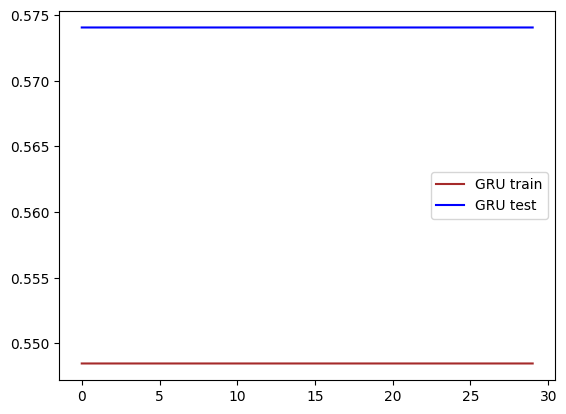

In [56]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [41]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [379]:
np.shape(pred_y)

(8068, 1)

In [380]:
pred_y

array([[0.5101583 ],
       [0.21769784],
       [0.14766175],
       ...,
       [0.14267062],
       [0.16142426],
       [0.14541563]], dtype=float32)

In [381]:
pred_y=np.reshape(pred_y,8068)

0.165791329354823
0.13997668965682108
0.40717481424422974
0.2347832532878717


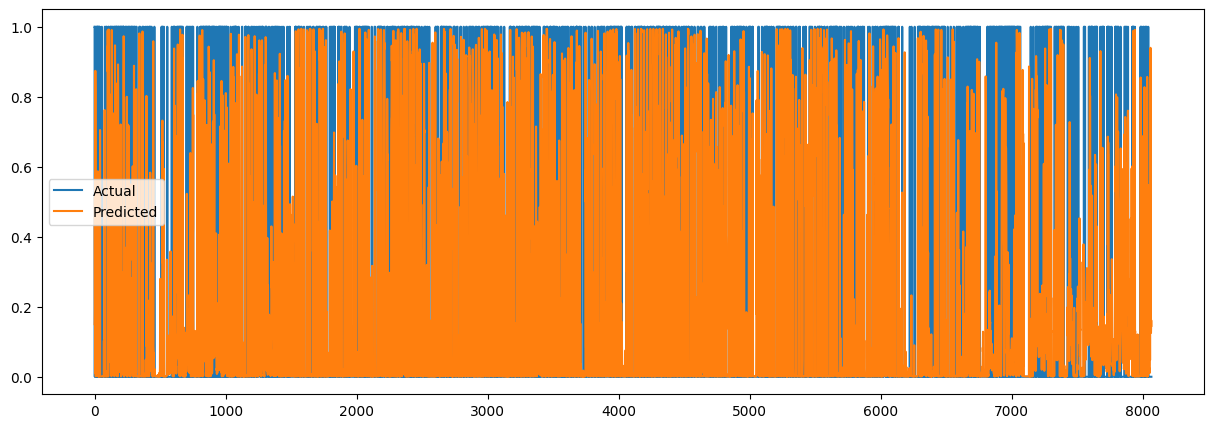

In [382]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [383]:
np.shape(train_X)

(32272, 3, 15)

In [384]:
np.shape(train_y)

(32272, 1)

In [385]:
np.shape(test_X)

(8068, 3, 15)

In [386]:
np.shape(test_y)

(8068, 1)

1261/1261 [==============================] - 7s 6ms/step


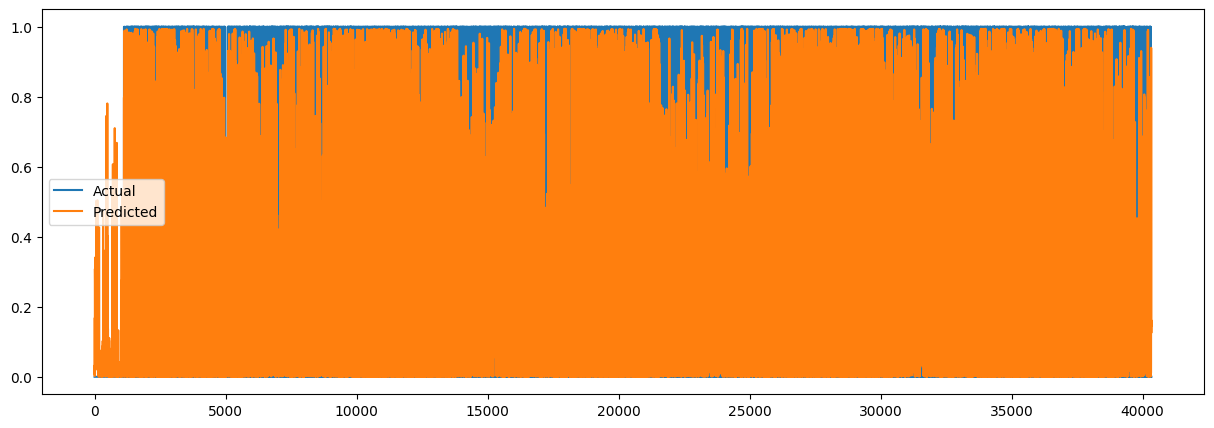

In [387]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

In [388]:
#over small part of data
plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [389]:
print(sum(tes)/len(tes))

[0.24179474]


In [390]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.64890066]
[0.86993334]
total acc [0.82233515]


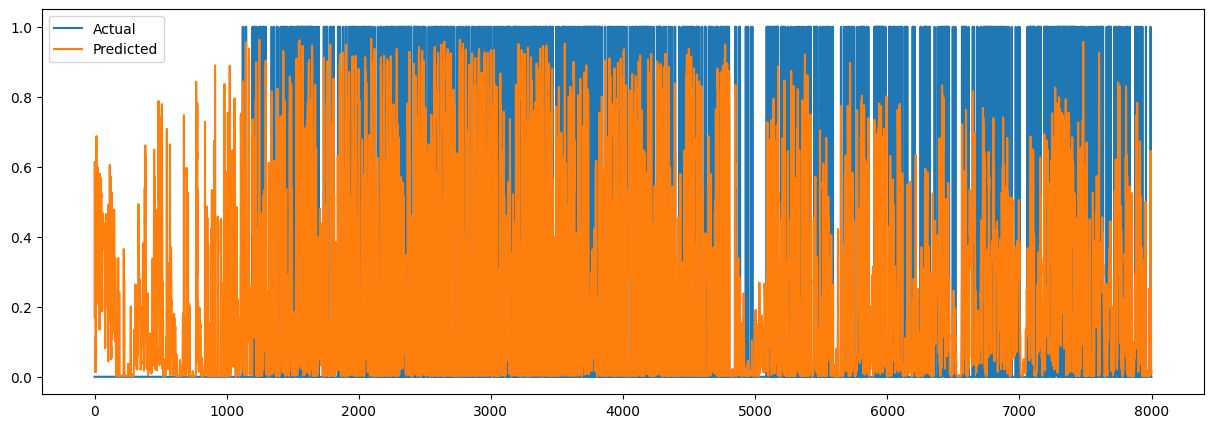

In [323]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:
            8000], label = 'Predicted')
plt.legend()
plt.show()

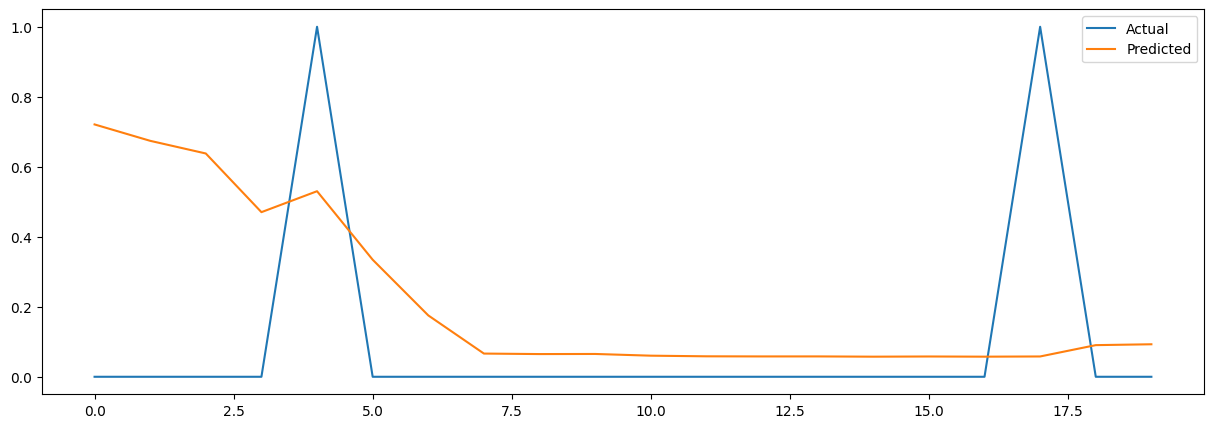

In [220]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

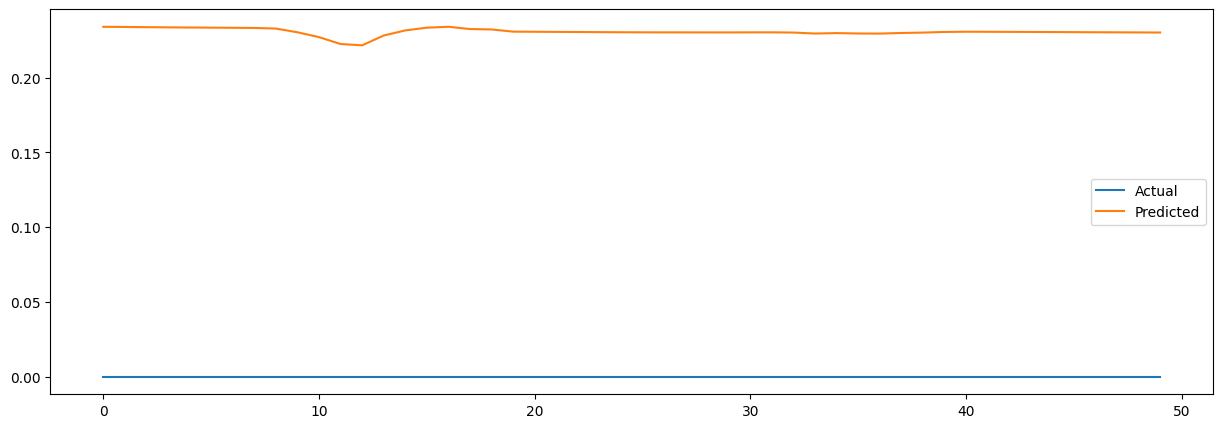

In [66]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

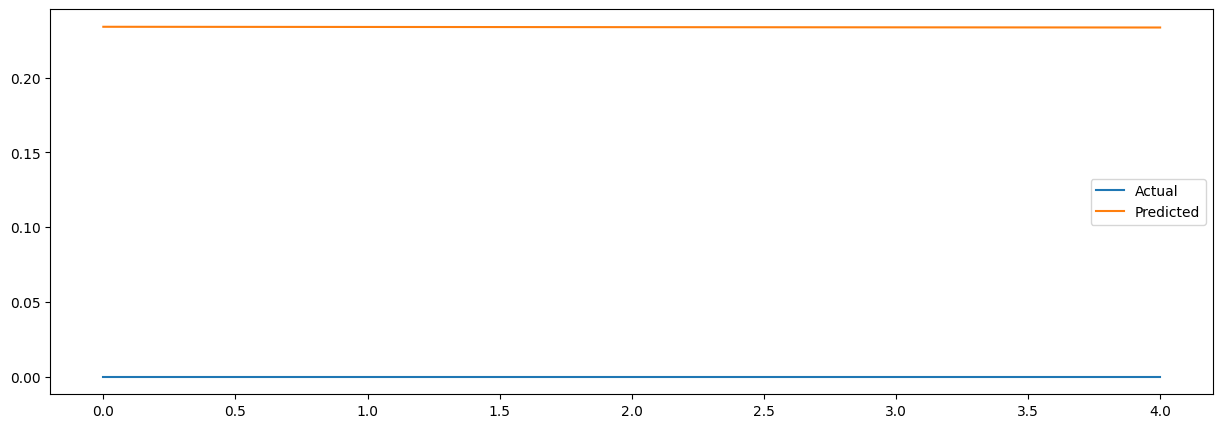

In [67]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

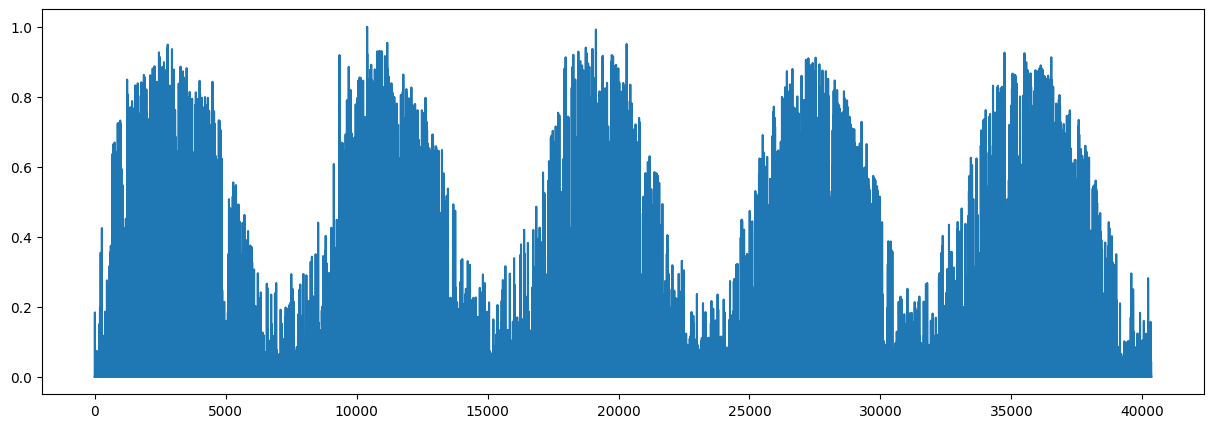

In [68]:
plt.plot(scaled[3], label = 'Actual')

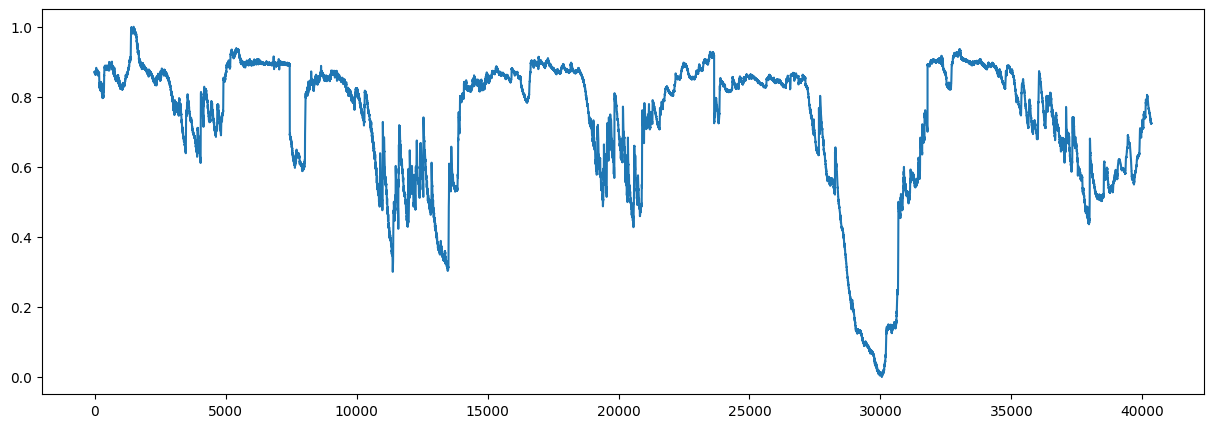

In [69]:
plt.plot(scaled[2], label = 'Actual')

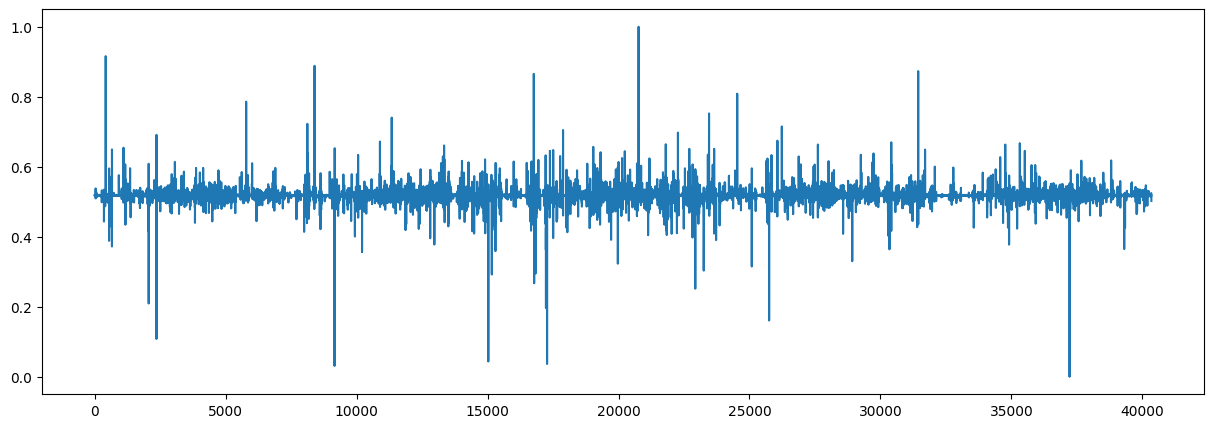

In [70]:
plt.plot(scaled[1], label = 'Actual')

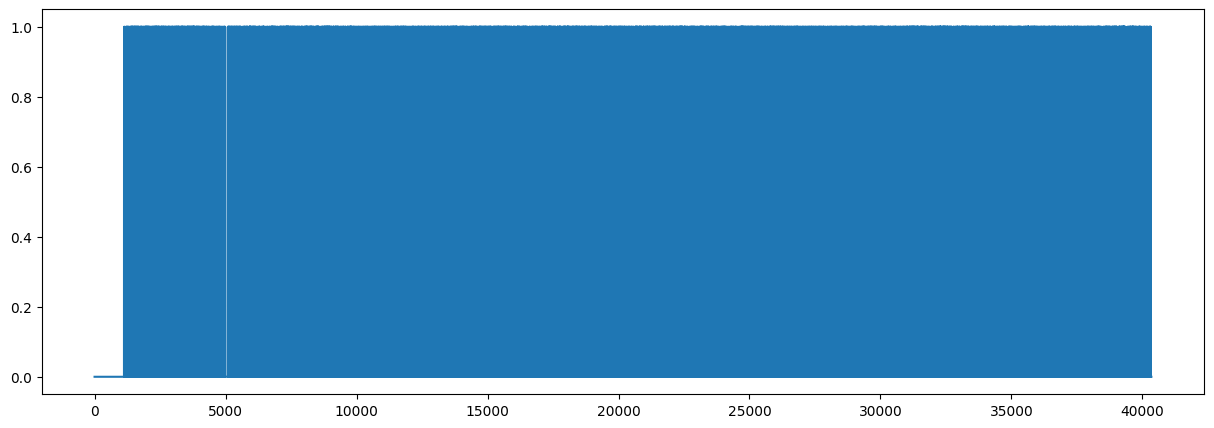

In [71]:
plt.plot(scaled[0], label = 'Actual')